<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2151-2200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1351]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1352]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

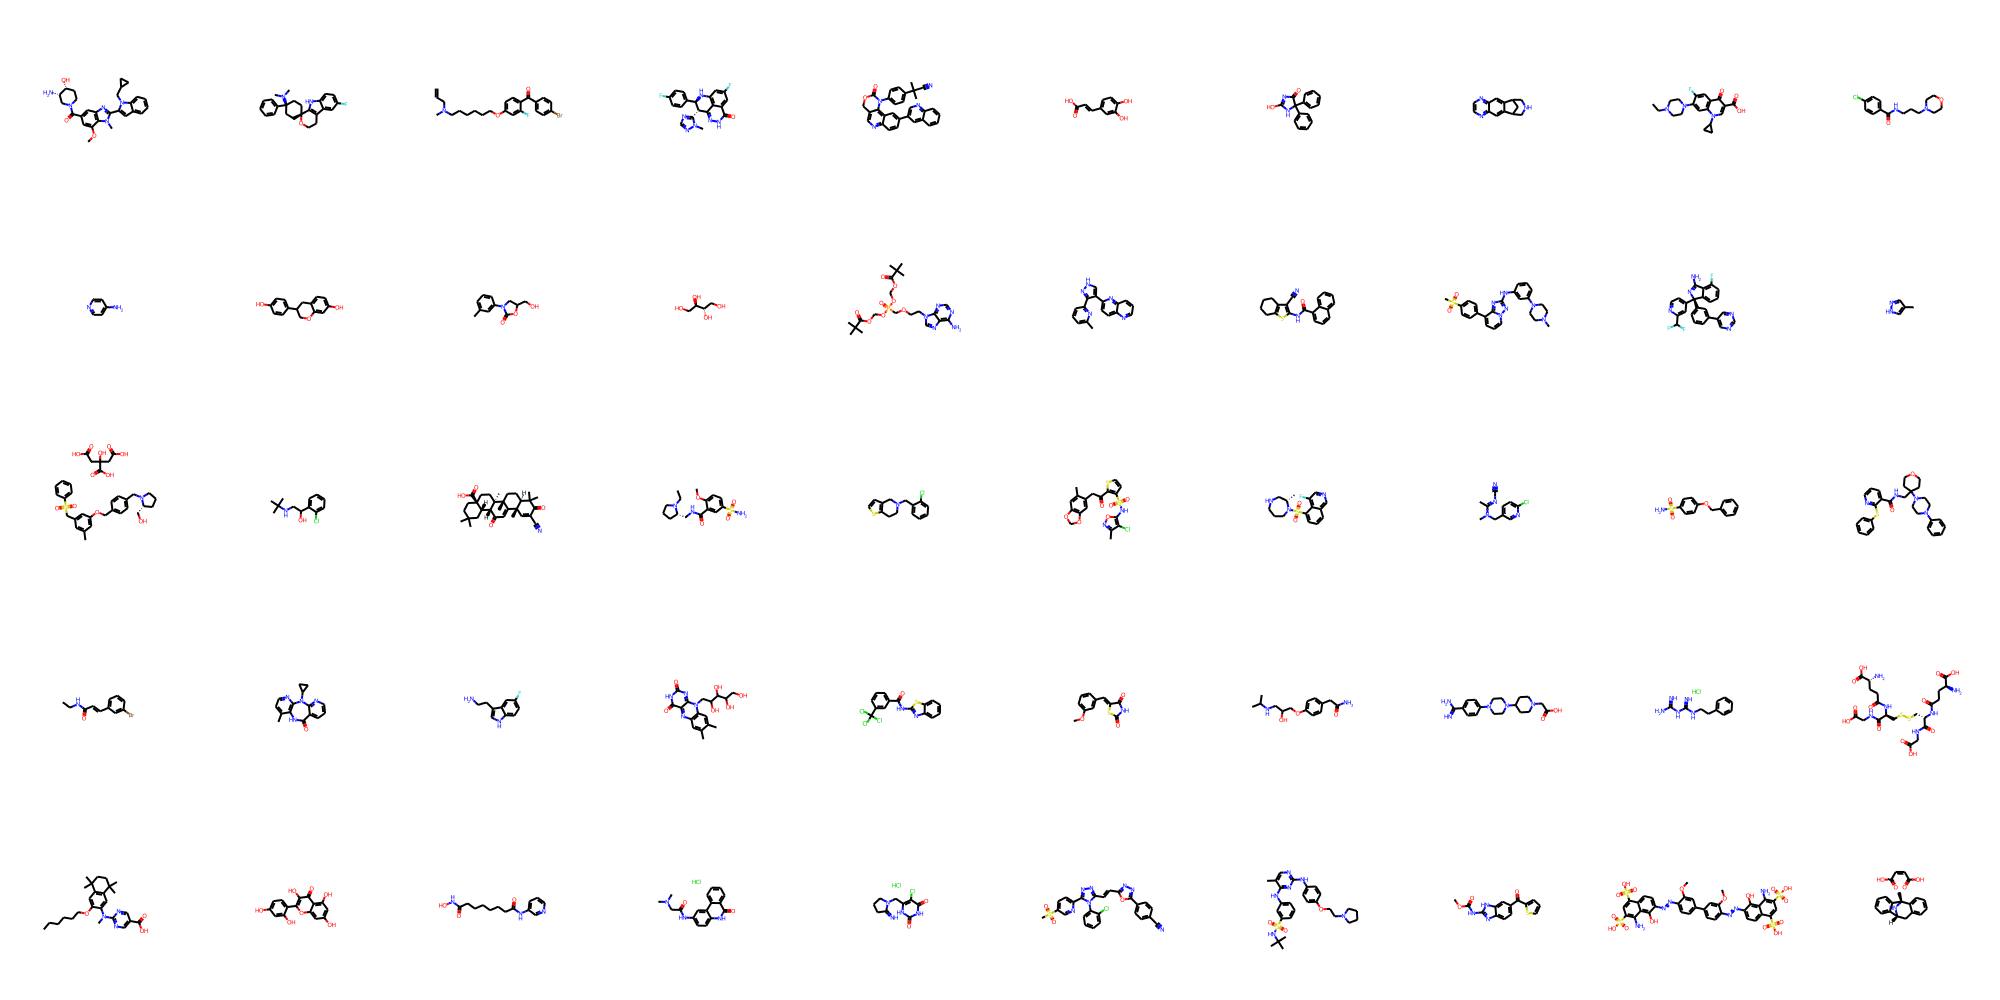

In [1353]:
smiles_list = [

'COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3cc4ccccc4n3CC3CC3)n(C)c12',
'CN(C)[C@]1(c2ccccc2)CC[C@]2(CC1)OCCc1c3cc(F)ccc3[nH]c12',
'C=CCN(C)CCCCCCOc1ccc(C(=O)c2ccc(Br)cc2)c(F)c1',
'Cn1ncnc1[C@H]1c2n[nH]c(=O)c3cc(F)cc(c23)N[C@@H]1c1ccc(F)cc1',
'CC(C)(C#N)c1ccc(N2C(=O)OCc3cnc4ccc(-c5cnc6ccccc6c5)cc4c32)cc1',
'O=C(O)/C=C/c1ccc(O)c(O)c1',
'O=C1N=C(O)NC1(c1ccccc1)c1ccccc1',
'c1cnc2cc3c(cc2n1)C1CNCC3C1',
'CCN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)CC1',
'O=C(NCCCN1CCOCC1)c1ccc(Cl)cc1',
'Nc1ccncc1',
'Oc1ccc(C2COc3cc(O)ccc3C2)cc1',
'Cc1cccc(N2CC(CO)OC2=O)c1',
'OC[C@H](O)[C@H](O)CO',
'CC(C)(C)C(=O)OCOP(=O)(COCCn1cnc2c(N)ncnc21)OCOC(=O)C(C)(C)C',
'Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1',
'N#Cc1c(NC(=O)c2cccc3ccccc23)sc2c1CCCC2',
'CN1CCN(c2cccc(Nc3nc4c(-c5ccc(S(C)(=O)=O)cc5)cccn4n3)c2)CC1',
'NC1=N[C@@](c2cccc(-c3cncnc3)c2)(c2ccnc(C(F)F)c2)c2cccc(F)c21',
'Cc1cn[nH]c1',
'Cc1cc(CS(=O)(=O)c2ccccc2)cc(OCc2ccc(CN3CCC[C@@H]3CO)cc2)c1.O=C(O)CC(O)(CC(=O)O)C(=O)O',
'CC(C)(C)NCC(O)c1ccccc1Cl',
'CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](C(=O)C=C4[C@@]3(C)CC[C@H]3C(C)(C)C(=O)C(C#N)=C[C@]43C)[C@@H]2C1',
'CCN1CCC[C@H]1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC',
'Clc1ccccc1CN1CCc2sccc2C1',
'Cc1cc2c(cc1CC(=O)c1sccc1S(=O)(=O)Nc1onc(C)c1Cl)OCO2',
'C[C@H]1CNCCCN1S(=O)(=O)c1cccc2cncc(F)c12',
'CC(=NC#N)N(C)Cc1ccc(Cl)nc1',
'NS(=O)(=O)c1ccc(OCc2ccccc2)cc1',
'O=C(NCC1(N2CCN(c3ccccc3)CC2)CCOCC1)c1cccnc1Sc1ccccc1',
'CCNC(=O)/C=C/c1cccc(Br)c1',
'Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1',
'NCCc1c[nH]c2ccc(F)cc12',
'Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(CC(O)C(O)C(O)CO)c2cc1C',
'O=C(Nc1nc2ccccc2s1)c1cccc(C(Cl)(Cl)Cl)c1',
'COc1cccc(/C=C2\SC(=O)NC2=O)c1',
'CC(C)NCC(O)COc1ccc(CC(N)=O)cc1',
'N=C(N)c1ccc(N2CCN(C3CCN(CC(=O)O)CC3)CC2)cc1',
'Cl.N=C(N)NC(=N)NCCc1ccccc1',
'N[C@@H](CCC(=O)N[C@@H](CSSC[C@H](NC(=O)CC[C@@H](N)C(=O)O)C(=O)NCC(=O)O)C(=O)NCC(=O)O)C(=O)O',
'CCCCCCOc1cc2c(cc1N(C)c1ncc(C(=O)O)cn1)C(C)(C)CCC2(C)C',
'O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12',
'O=C(CCCCCCC(=O)Nc1cccnc1)NO',
'CN(C)CC(=O)Nc1ccc2[nH]c(=O)c3ccccc3c2c1.Cl',
'Cl.N=C1CCCN1Cc1[nH]c(=O)[nH]c(=O)c1Cl',
'CS(=O)(=O)c1ccc(-c2nnc(/C=C/c3nnc(-c4ccc(C#N)cc4)o3)n2-c2ccccc2Cl)nc1',
'Cc1cnc(Nc2ccc(OCCN3CCCC3)cc2)nc1Nc1cccc(S(=O)(=O)NC(C)(C)C)c1',
'COC(=O)Nc1nc2ccc(C(=O)c3cccs3)cc2[nH]1',
'COc1cc(-c2ccc(/N=N/c3ccc4c(S(=O)(=O)O)cc(S(=O)(=O)O)c(N)c4c3O)c(OC)c2)ccc1/N=N/c1ccc2c(S(=O)(=O)O)cc(S(=O)(=O)O)c(N)c2c1O',
'C[C@]12N[C@H](Cc3ccccc31)c1ccccc12.O=C(O)/C=C\C(=O)O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



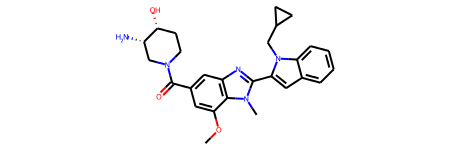

In [1354]:
M1 = mol_list [0]
M1

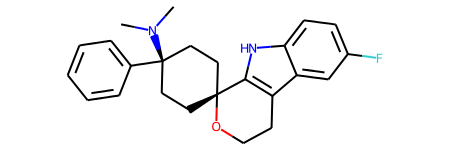

In [1355]:
M2 = mol_list [1]
M2

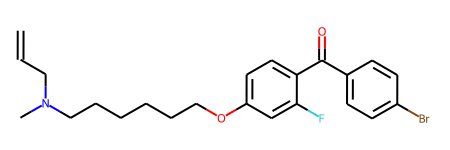

In [1356]:
M3 = mol_list [2]
M3

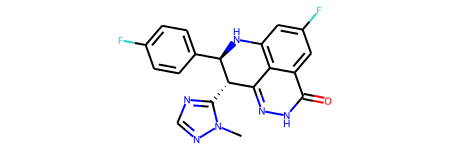

In [1357]:
M4 = mol_list [3]
M4

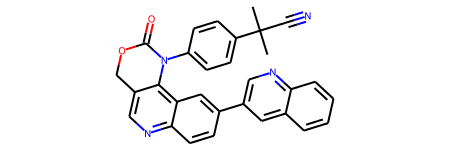

In [1358]:
M5 = mol_list [4]
M5

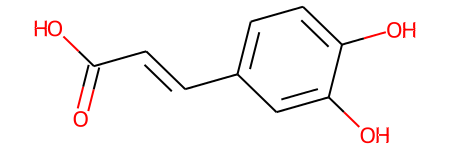

In [1359]:
M6 = mol_list [5]
M6

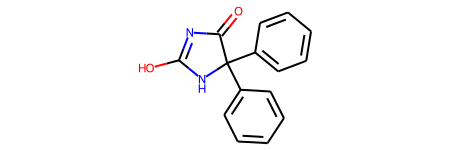

In [1360]:
M7 = mol_list [6]
M7

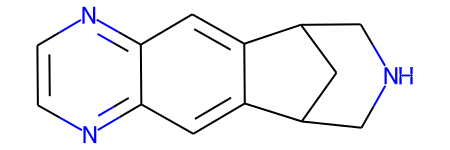

In [1361]:
M8 = mol_list [7]
M8

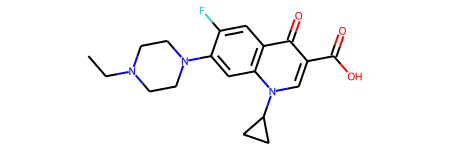

In [1362]:
M9 = mol_list [8]
M9

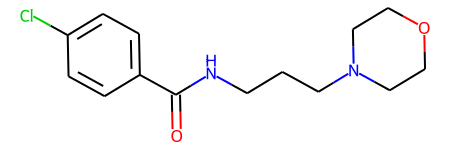

In [1363]:
M10 = mol_list [9]
M10

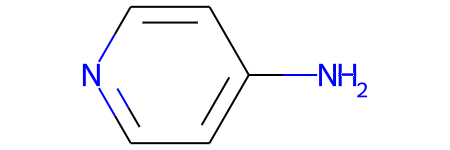

In [1364]:
M11 = mol_list [10]
M11

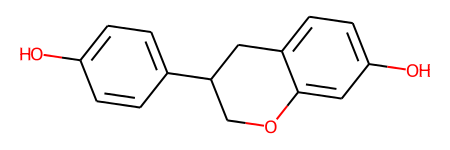

In [1365]:
M12 = mol_list [11]
M12

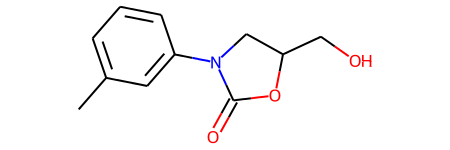

In [1366]:
M13 = mol_list [12]
M13

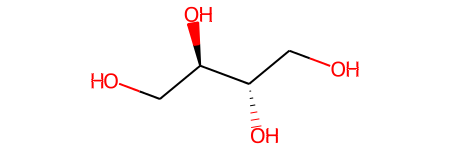

In [1367]:
M14 = mol_list [13]
M14

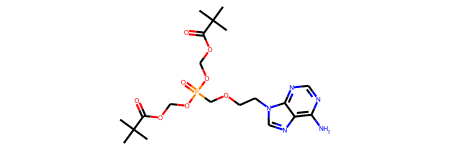

In [1368]:
M15 = mol_list [14]
M15

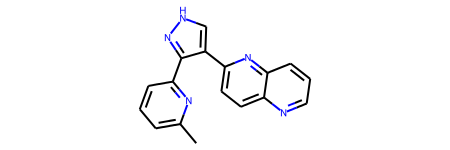

In [1369]:
M16 = mol_list [15]
M16

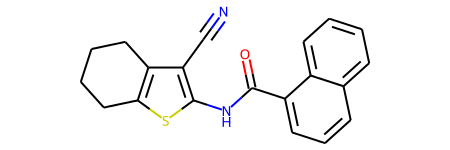

In [1370]:
M17 = mol_list [16]
M17

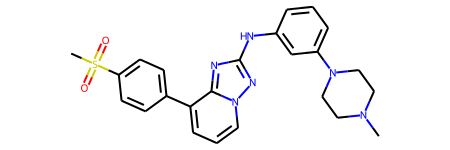

In [1371]:
M18 = mol_list [17]
M18

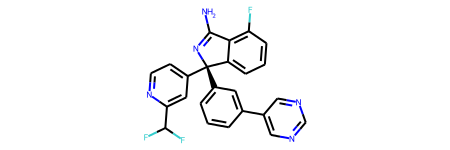

In [1372]:
M19 = mol_list [18]
M19

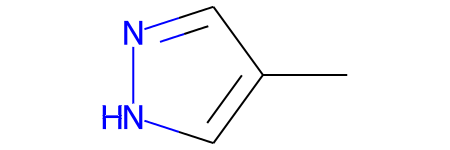

In [1373]:
M20 = mol_list [19]
M20

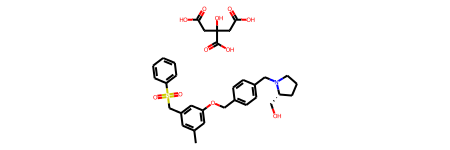

In [1374]:
M21 = mol_list [20]
M21

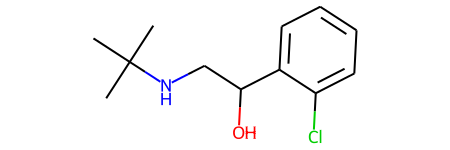

In [1375]:
M22 = mol_list [21]
M22

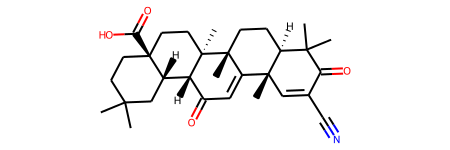

In [1376]:
M23 = mol_list [22]
M23

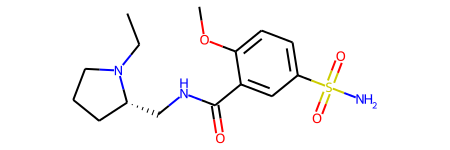

In [1377]:
M24 = mol_list [23]
M24

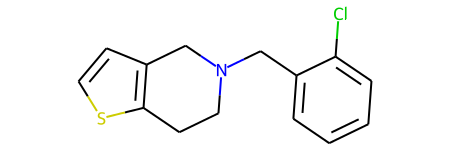

In [1378]:
M25 = mol_list [24]
M25

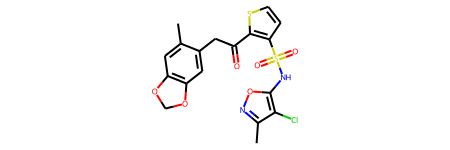

In [1379]:
M26 = mol_list [25]
M26

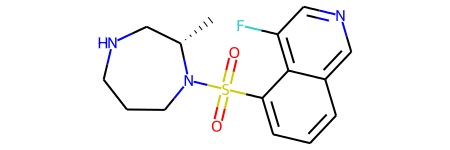

In [1380]:
M27 = mol_list [26]
M27

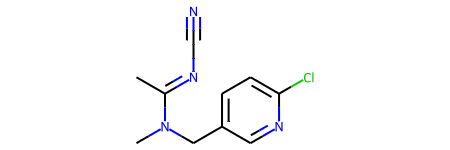

In [1381]:
M28 = mol_list [27]
M28

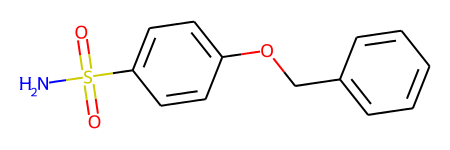

In [1382]:
M29 = mol_list [28]
M29

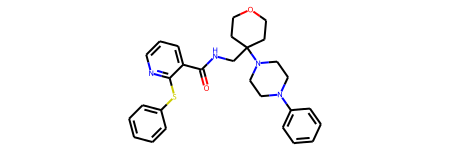

In [1383]:
M30 = mol_list [29]
M30

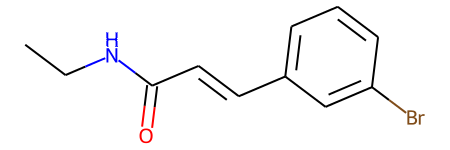

In [1384]:
M31 = mol_list [30]
M31

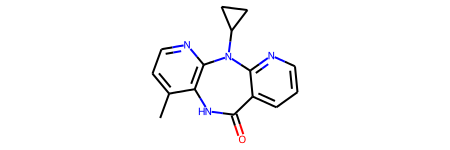

In [1385]:
M32 = mol_list [31]
M32

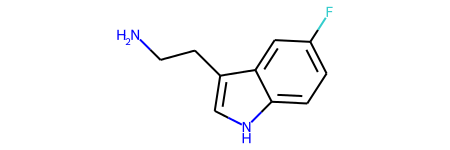

In [1386]:
M33 = mol_list [32]
M33

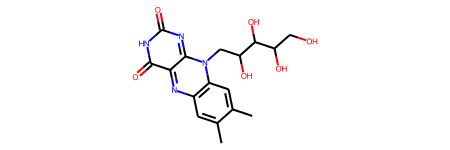

In [1387]:
M34 = mol_list [33]
M34

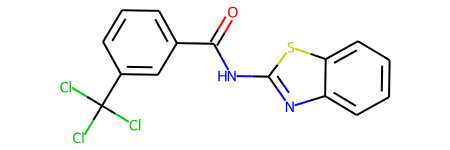

In [1388]:
M35 = mol_list [34]
M35

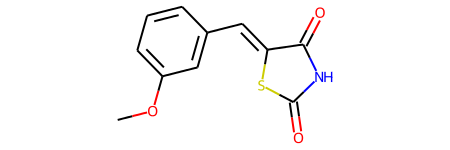

In [1389]:
M36 = mol_list [35]
M36

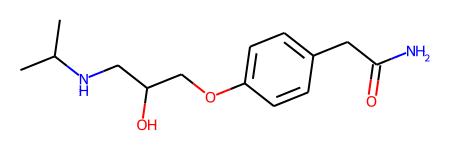

In [1390]:
M37= mol_list [36]
M37

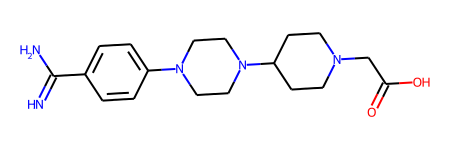

In [1391]:
M38= mol_list [37]
M38

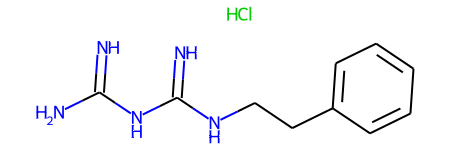

In [1392]:
M39= mol_list [38]
M39

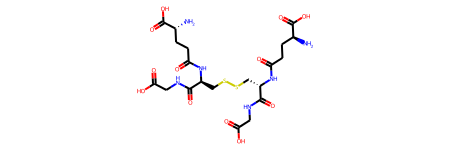

In [1393]:
M40= mol_list [39]
M40

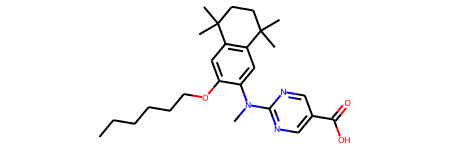

In [1394]:
M41= mol_list [40]
M41

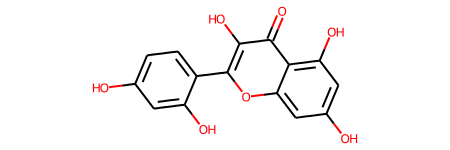

In [1395]:
M42= mol_list [41]
M42

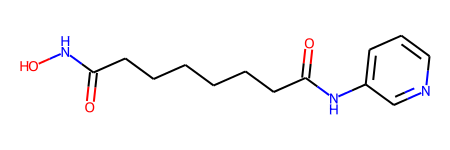

In [1396]:
M43= mol_list [42]
M43

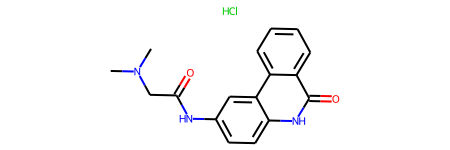

In [1397]:
M44= mol_list [43]
M44

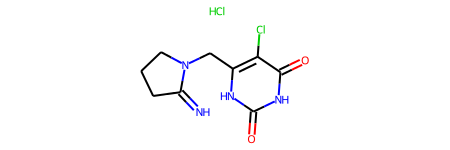

In [1398]:
M45= mol_list [44]
M45

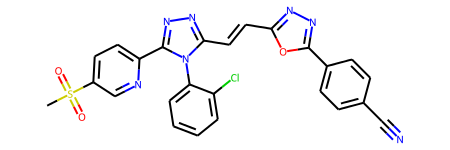

In [1399]:
M46= mol_list [45]
M46

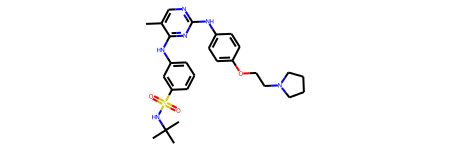

In [1400]:
M47= mol_list [46]
M47

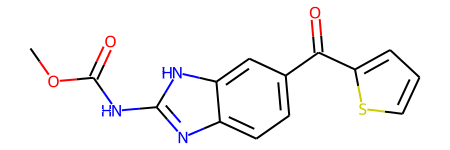

In [1401]:
M48= mol_list [47]
M48

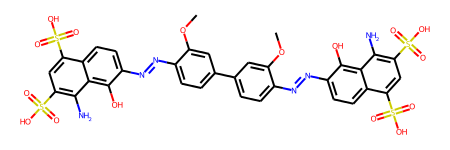

In [1402]:
M49= mol_list [48]
M49

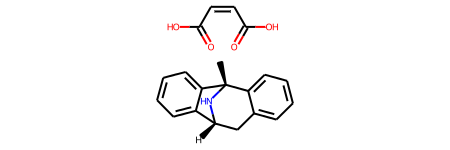

In [1403]:
M50= mol_list [49]
M50

In [1404]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[29,
 33,
 45,
 63,
 64,
 73,
 80,
 100,
 121,
 122,
 127,
 147,
 175,
 214,
 226,
 233,
 241,
 249,
 261,
 294,
 301,
 356,
 361,
 378,
 416,
 428,
 430,
 442,
 445,
 451,
 456,
 480,
 497,
 501,
 509,
 512,
 559,
 564,
 639,
 647,
 650,
 652,
 668,
 695,
 698,
 707,
 726,
 739,
 802,
 807,
 808,
 831,
 841,
 849,
 875,
 889,
 893,
 908,
 926,
 935,
 939,
 946,
 981,
 985,
 1009,
 1019]

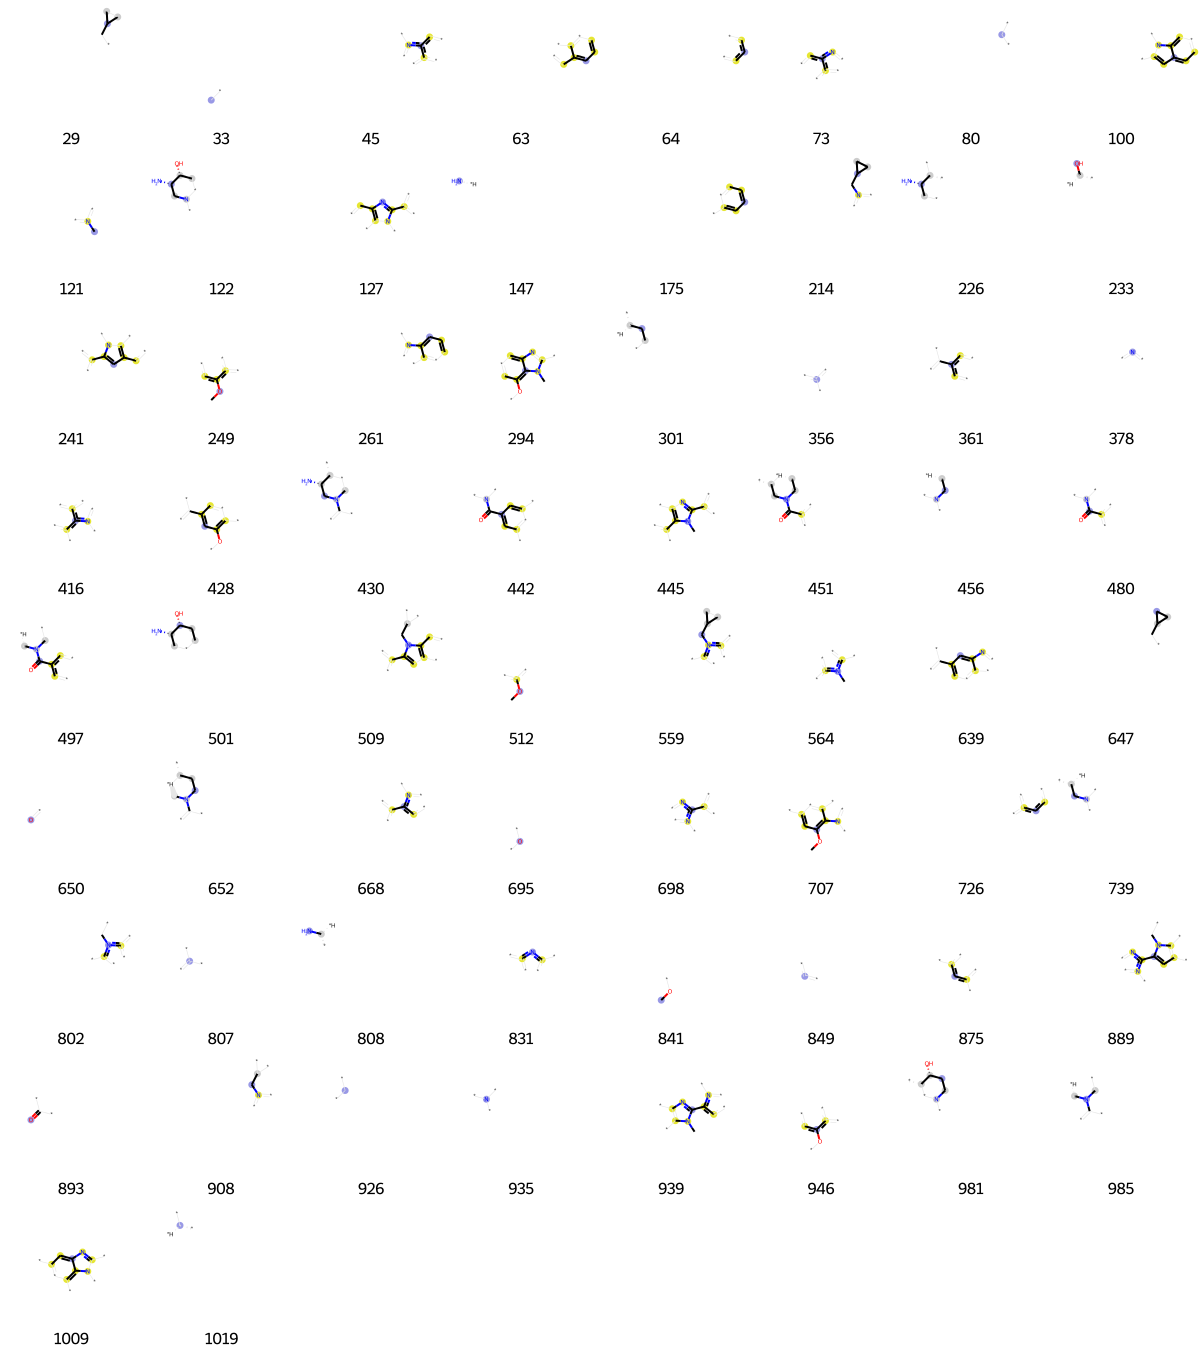

In [1405]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1406]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[33,
 36,
 64,
 68,
 90,
 119,
 122,
 130,
 138,
 139,
 175,
 193,
 254,
 275,
 324,
 333,
 346,
 356,
 361,
 362,
 386,
 389,
 400,
 421,
 463,
 474,
 556,
 646,
 656,
 699,
 714,
 721,
 726,
 772,
 836,
 839,
 849,
 856,
 875,
 881,
 904,
 915,
 917,
 926,
 938,
 950,
 1017]

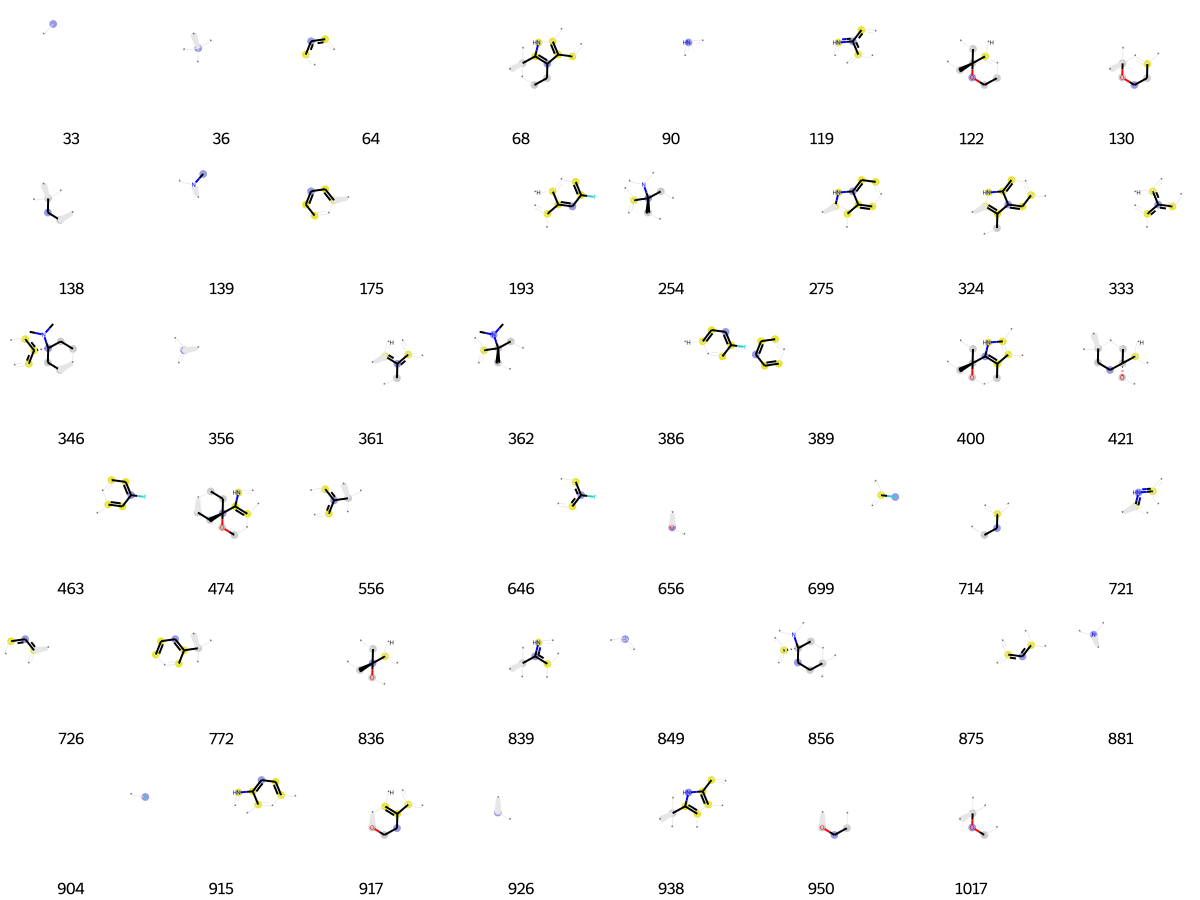

In [1407]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1408]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[9,
 10,
 13,
 33,
 67,
 80,
 119,
 133,
 139,
 212,
 225,
 259,
 305,
 322,
 342,
 345,
 356,
 361,
 406,
 428,
 477,
 506,
 607,
 621,
 625,
 636,
 645,
 650,
 673,
 694,
 695,
 699,
 718,
 726,
 728,
 751,
 764,
 790,
 807,
 816,
 849,
 875,
 881,
 887,
 893,
 904,
 909,
 927,
 940,
 967,
 976]

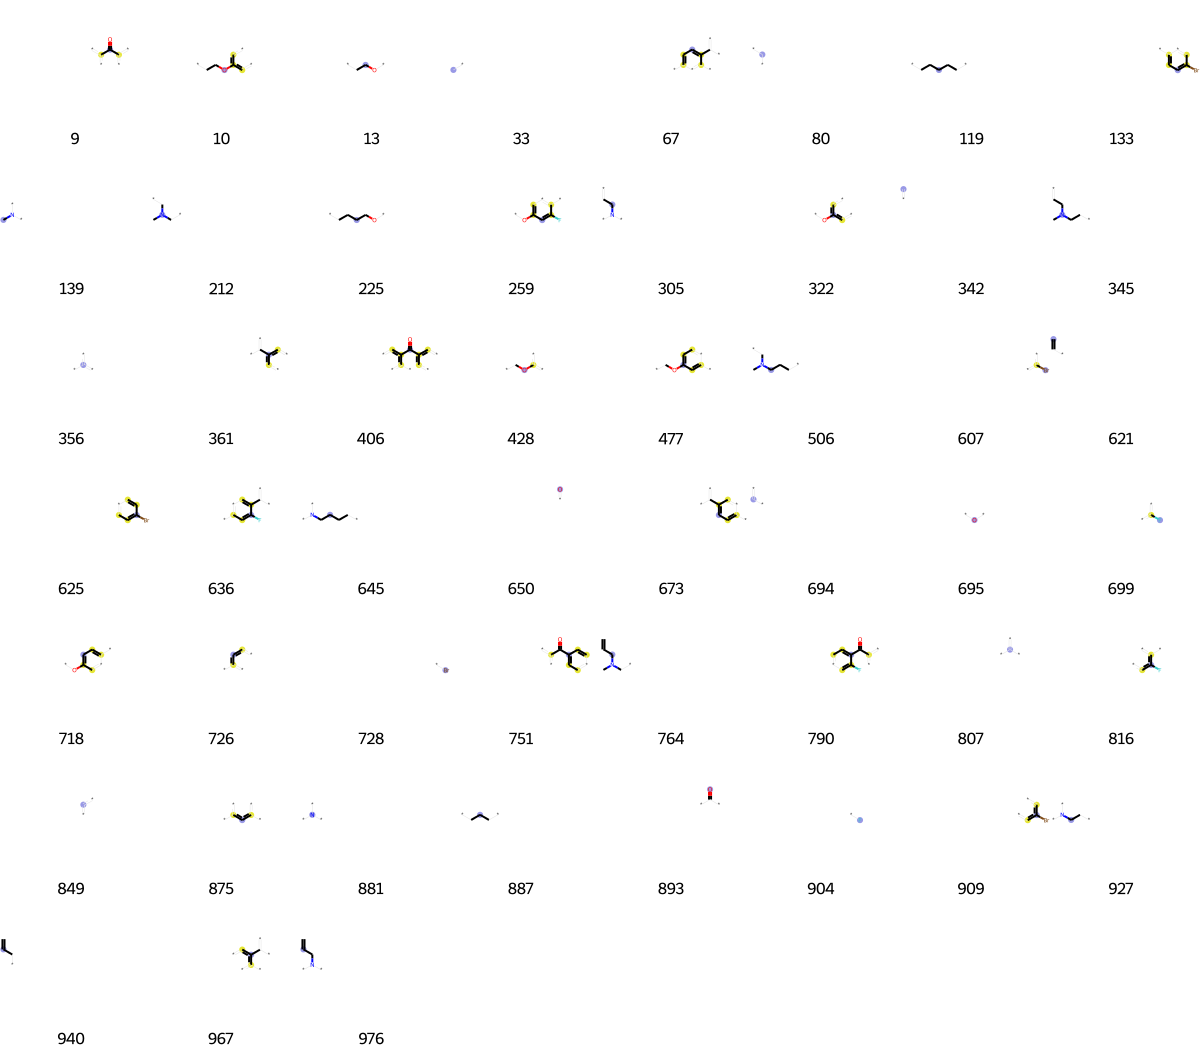

In [1409]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1410]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[0,
 33,
 43,
 74,
 81,
 90,
 105,
 121,
 124,
 127,
 174,
 193,
 250,
 255,
 301,
 314,
 318,
 333,
 356,
 378,
 381,
 386,
 405,
 428,
 429,
 443,
 489,
 498,
 537,
 574,
 592,
 646,
 650,
 699,
 721,
 726,
 745,
 750,
 767,
 779,
 822,
 849,
 869,
 875,
 892,
 904,
 935,
 958,
 960,
 964,
 980,
 1019]

In [1411]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[26,
 33,
 54,
 63,
 64,
 72,
 73,
 114,
 115,
 119,
 136,
 146,
 152,
 158,
 168,
 175,
 204,
 212,
 233,
 289,
 314,
 316,
 333,
 342,
 356,
 360,
 372,
 378,
 392,
 393,
 427,
 428,
 441,
 463,
 477,
 499,
 511,
 608,
 609,
 629,
 641,
 645,
 650,
 656,
 662,
 674,
 714,
 726,
 727,
 762,
 785,
 790,
 801,
 831,
 849,
 875,
 896,
 926,
 935,
 959,
 961]

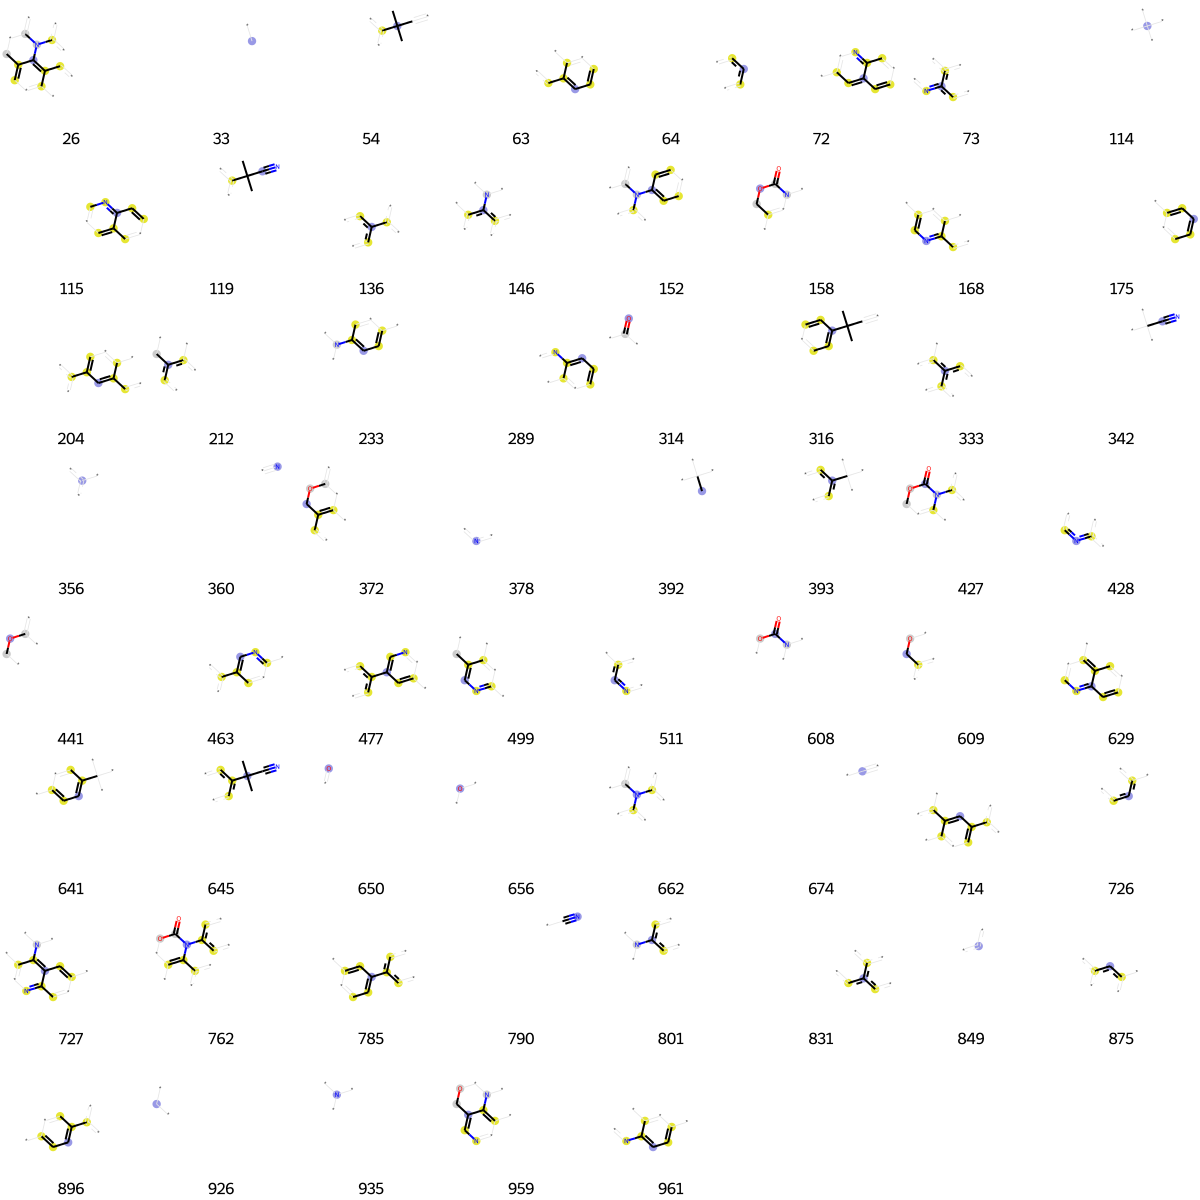

In [1412]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1413]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[25,
 31,
 284,
 315,
 356,
 389,
 451,
 508,
 578,
 583,
 589,
 650,
 694,
 711,
 726,
 807,
 835,
 849,
 875,
 893,
 970,
 976,
 1009,
 1017]

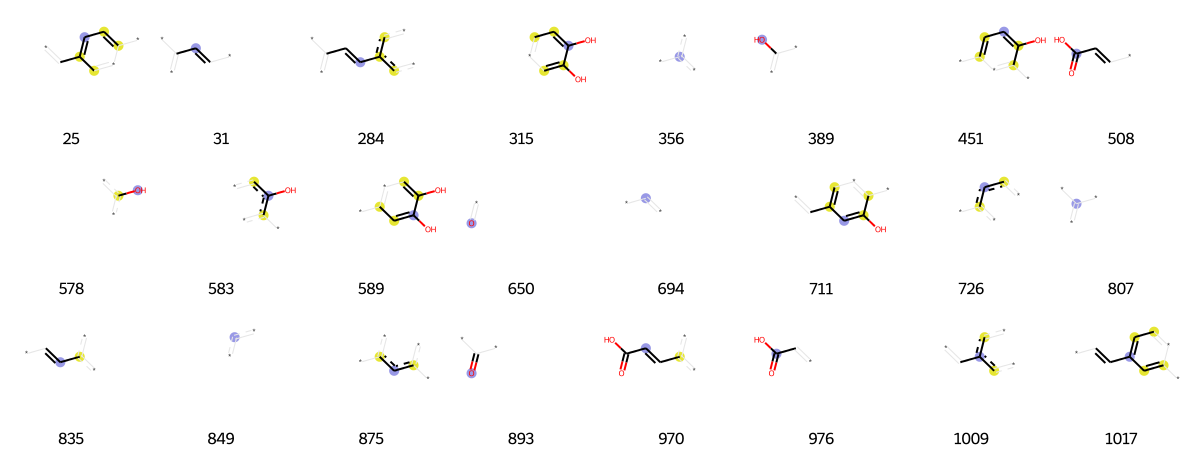

In [1414]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1415]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[15,
 36,
 64,
 90,
 175,
 314,
 356,
 378,
 389,
 467,
 556,
 578,
 597,
 650,
 655,
 720,
 726,
 770,
 772,
 779,
 807,
 849,
 884,
 915,
 927,
 1017]

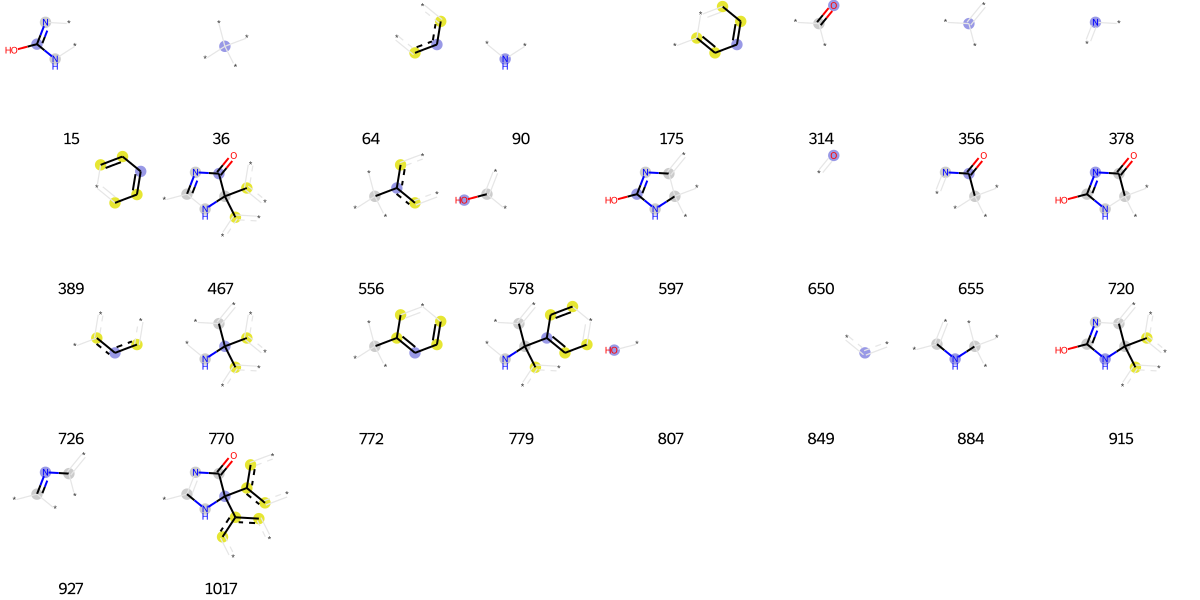

In [1416]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1417]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[3,
 47,
 73,
 75,
 90,
 197,
 268,
 284,
 356,
 378,
 421,
 428,
 470,
 613,
 715,
 725,
 801,
 809,
 842,
 849,
 875,
 926,
 976,
 1019]

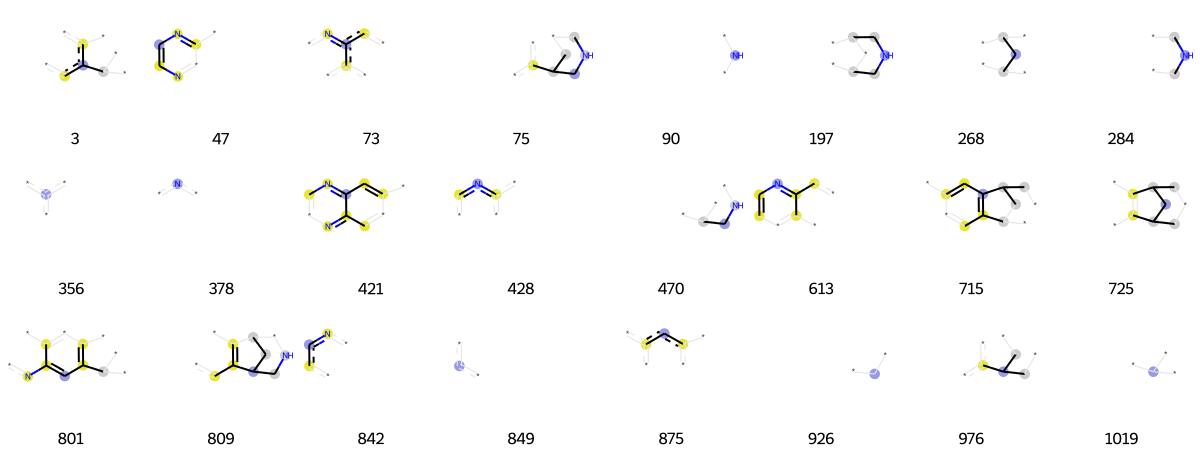

In [1418]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1419]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[23,
 33,
 34,
 45,
 74,
 80,
 116,
 164,
 231,
 253,
 271,
 294,
 301,
 308,
 314,
 326,
 333,
 338,
 356,
 389,
 407,
 453,
 456,
 464,
 484,
 507,
 525,
 577,
 624,
 650,
 699,
 705,
 713,
 767,
 807,
 816,
 849,
 865,
 875,
 880,
 886,
 893,
 904,
 926,
 935,
 967,
 974,
 1019]

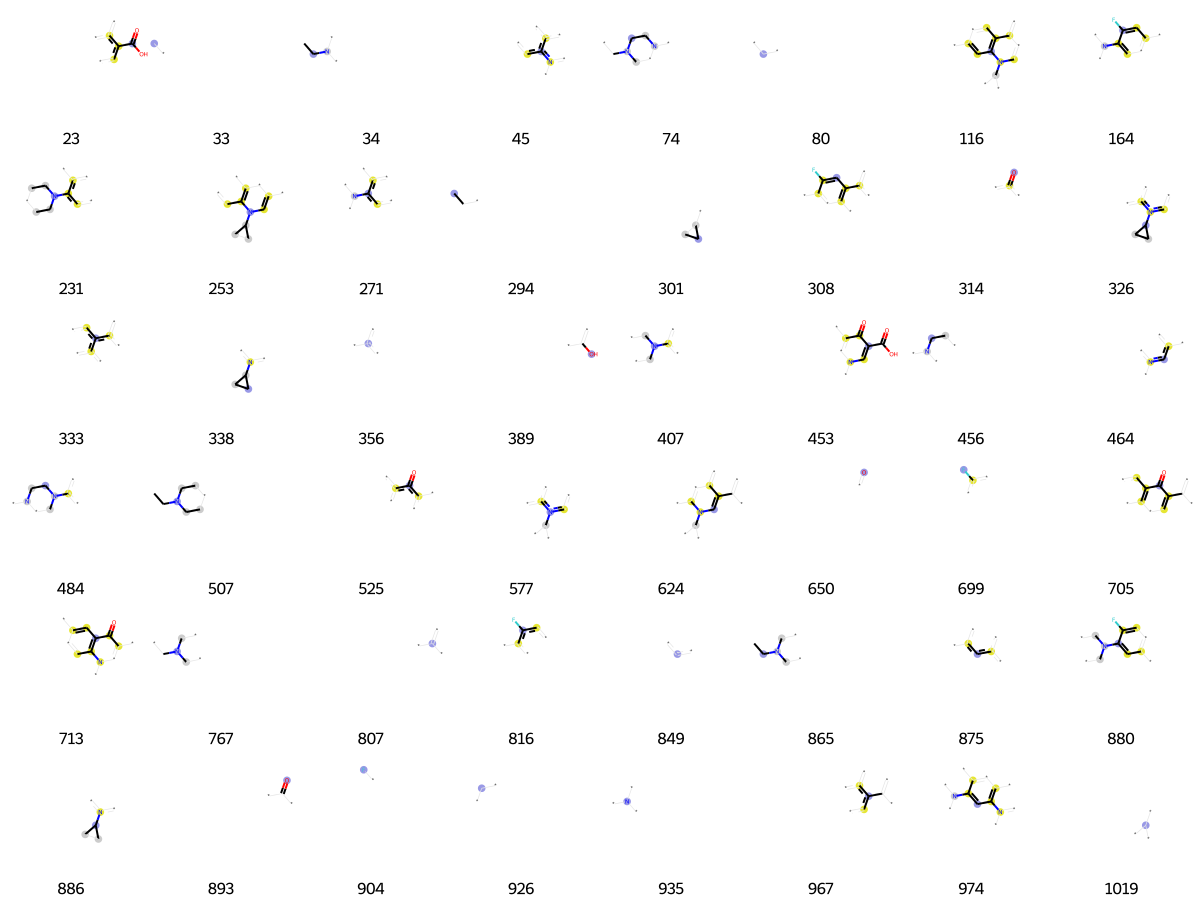

In [1420]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1421]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[8,
 46,
 80,
 121,
 128,
 197,
 216,
 265,
 350,
 356,
 361,
 381,
 417,
 456,
 458,
 486,
 523,
 561,
 641,
 650,
 653,
 656,
 659,
 667,
 673,
 726,
 767,
 807,
 816,
 825,
 849,
 852,
 887,
 893,
 926,
 935,
 950]

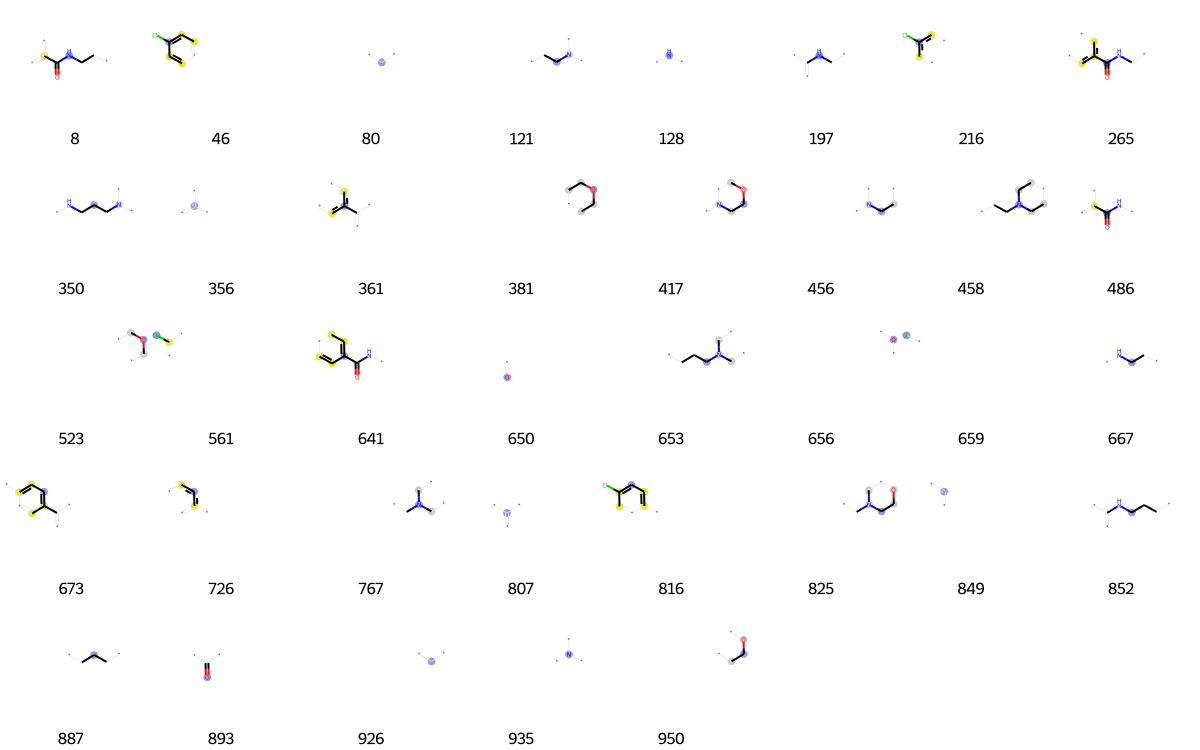

In [1422]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1423]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[147, 184, 356, 378, 383, 433, 439, 579, 726, 780, 842, 849, 888]

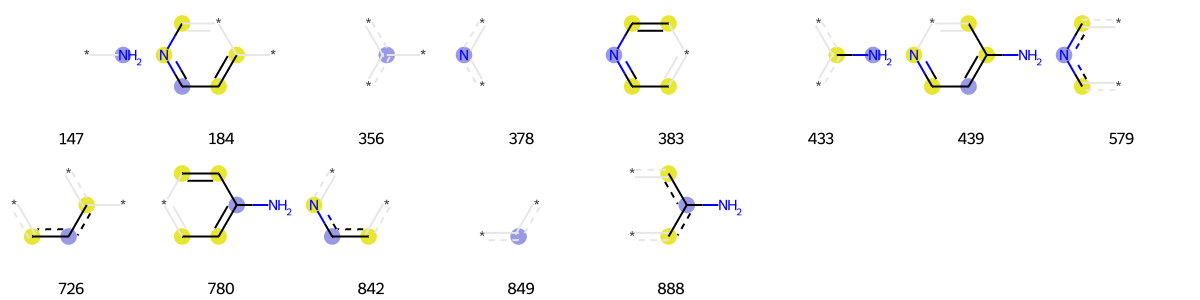

In [1424]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1425]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[6,
 66,
 123,
 134,
 212,
 231,
 255,
 289,
 356,
 381,
 441,
 513,
 578,
 656,
 726,
 745,
 754,
 779,
 783,
 790,
 807,
 825,
 849,
 875,
 881,
 899,
 926,
 956,
 976,
 1019]

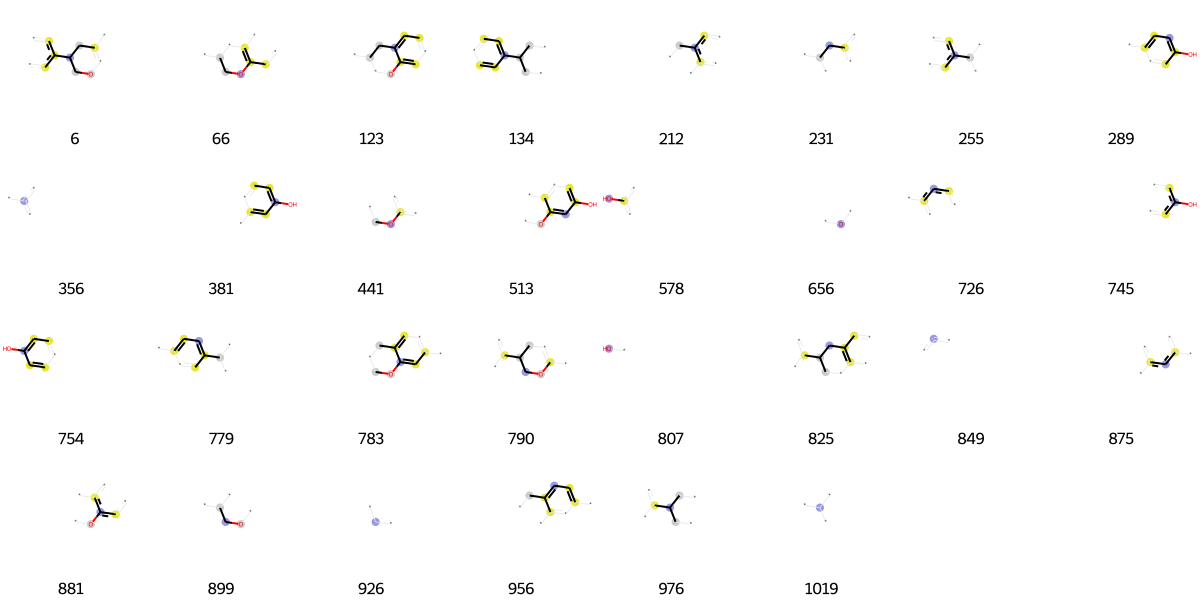

In [1426]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1427]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 25,
 31,
 33,
 64,
 80,
 190,
 222,
 268,
 314,
 356,
 367,
 407,
 433,
 492,
 511,
 532,
 606,
 608,
 650,
 656,
 698,
 726,
 739,
 750,
 799,
 801,
 807,
 819,
 849,
 875,
 926,
 935,
 952,
 1013,
 1019]

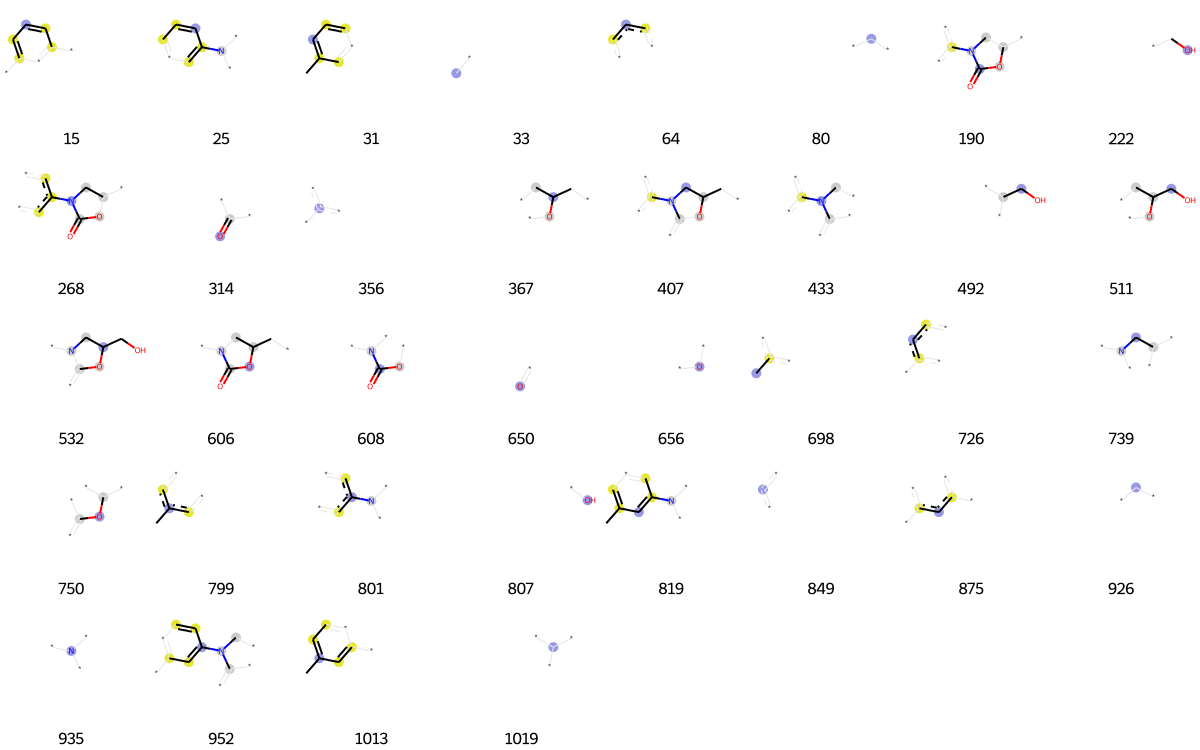

In [1428]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1429]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1, 80, 222, 227, 482, 807, 831, 845, 888]

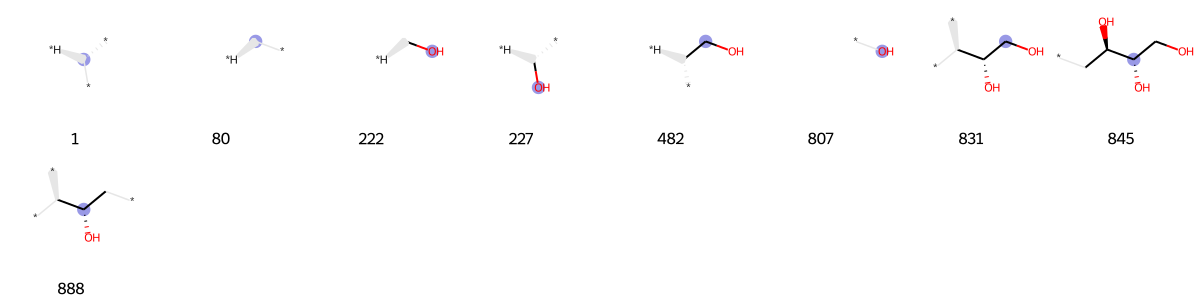

In [1430]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1431]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[9,
 13,
 33,
 70,
 71,
 80,
 114,
 121,
 125,
 147,
 192,
 209,
 270,
 336,
 351,
 356,
 378,
 392,
 401,
 428,
 431,
 433,
 435,
 445,
 486,
 489,
 492,
 521,
 548,
 650,
 653,
 672,
 684,
 692,
 695,
 696,
 700,
 703,
 728,
 786,
 807,
 830,
 849,
 884,
 893,
 932,
 935,
 962,
 964,
 968]

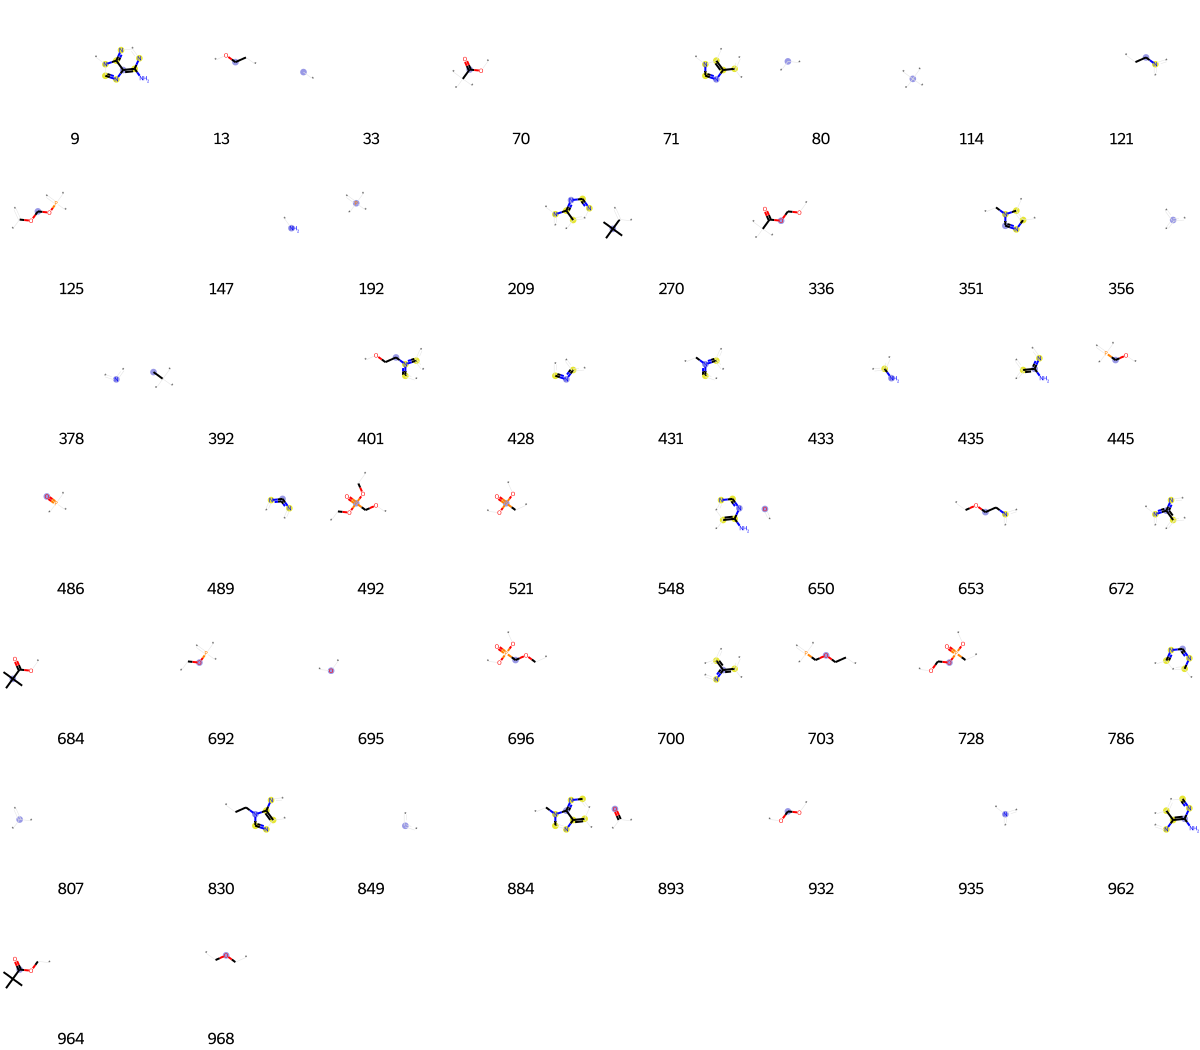

In [1432]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1433]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 15,
 19,
 33,
 64,
 73,
 90,
 118,
 179,
 209,
 260,
 289,
 323,
 352,
 356,
 377,
 378,
 394,
 428,
 448,
 560,
 613,
 623,
 641,
 695,
 698,
 707,
 726,
 796,
 811,
 827,
 831,
 842,
 849,
 855,
 936,
 961,
 980]

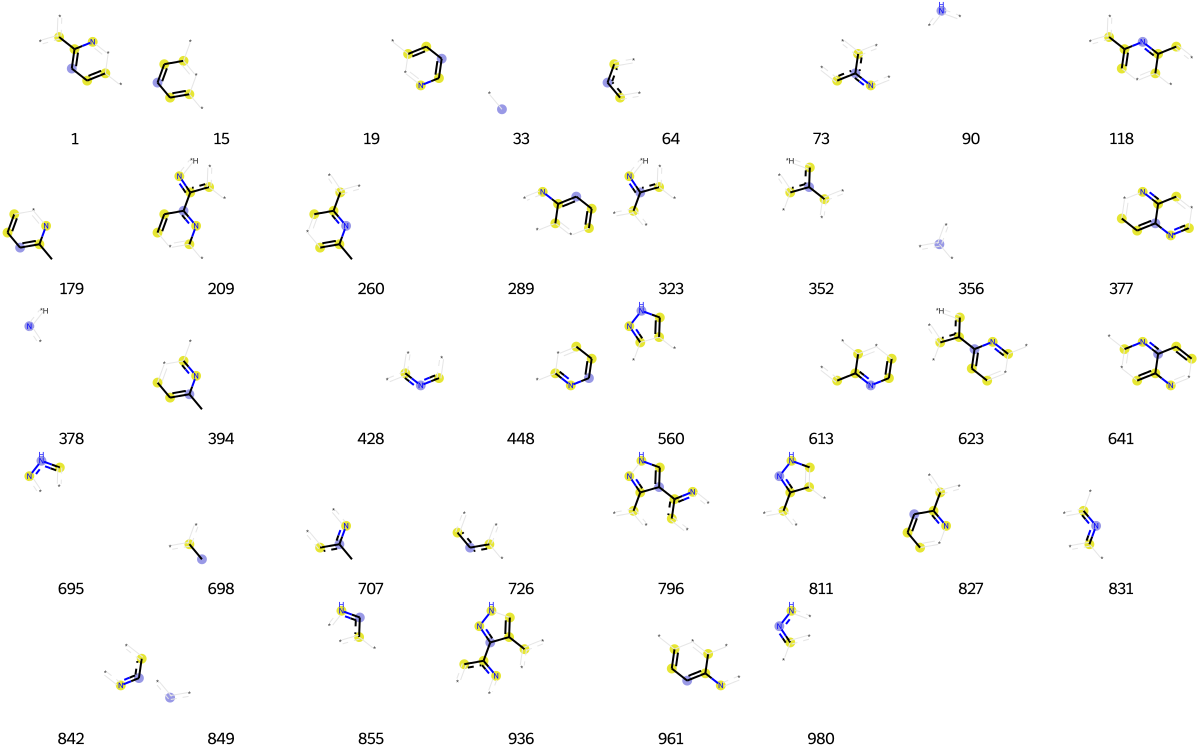

In [1434]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1435]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 4,
 15,
 42,
 50,
 63,
 64,
 80,
 96,
 112,
 128,
 162,
 175,
 213,
 216,
 220,
 223,
 310,
 333,
 356,
 358,
 360,
 361,
 367,
 423,
 486,
 549,
 593,
 598,
 650,
 674,
 675,
 714,
 726,
 790,
 792,
 793,
 801,
 807,
 831,
 847,
 849,
 893,
 926,
 967]

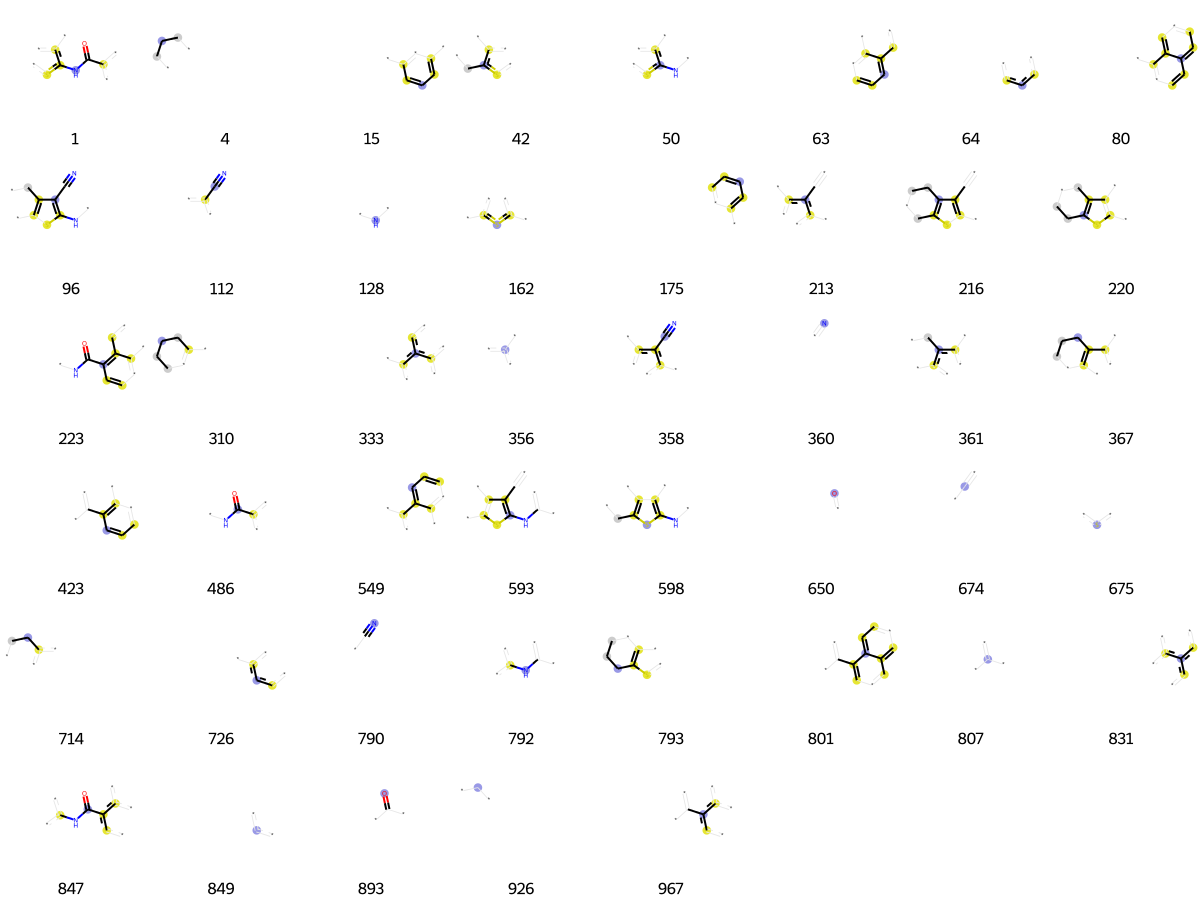

In [1436]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1437]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[3,
 14,
 15,
 21,
 25,
 33,
 64,
 77,
 95,
 121,
 128,
 136,
 164,
 191,
 207,
 212,
 222,
 252,
 319,
 329,
 350,
 352,
 356,
 378,
 407,
 452,
 456,
 484,
 491,
 495,
 496,
 515,
 526,
 558,
 562,
 595,
 643,
 650,
 672,
 687,
 692,
 696,
 703,
 715,
 726,
 783,
 801,
 831,
 849,
 875,
 896,
 910,
 926,
 932,
 935,
 984]

In [1438]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 8,
 15,
 26,
 36,
 64,
 94,
 136,
 147,
 183,
 252,
 257,
 259,
 277,
 302,
 356,
 378,
 381,
 395,
 428,
 433,
 436,
 487,
 489,
 501,
 511,
 550,
 556,
 567,
 579,
 698,
 699,
 718,
 723,
 726,
 736,
 772,
 784,
 785,
 787,
 816,
 822,
 842,
 847,
 849,
 875,
 878,
 904,
 928,
 934,
 945,
 956]

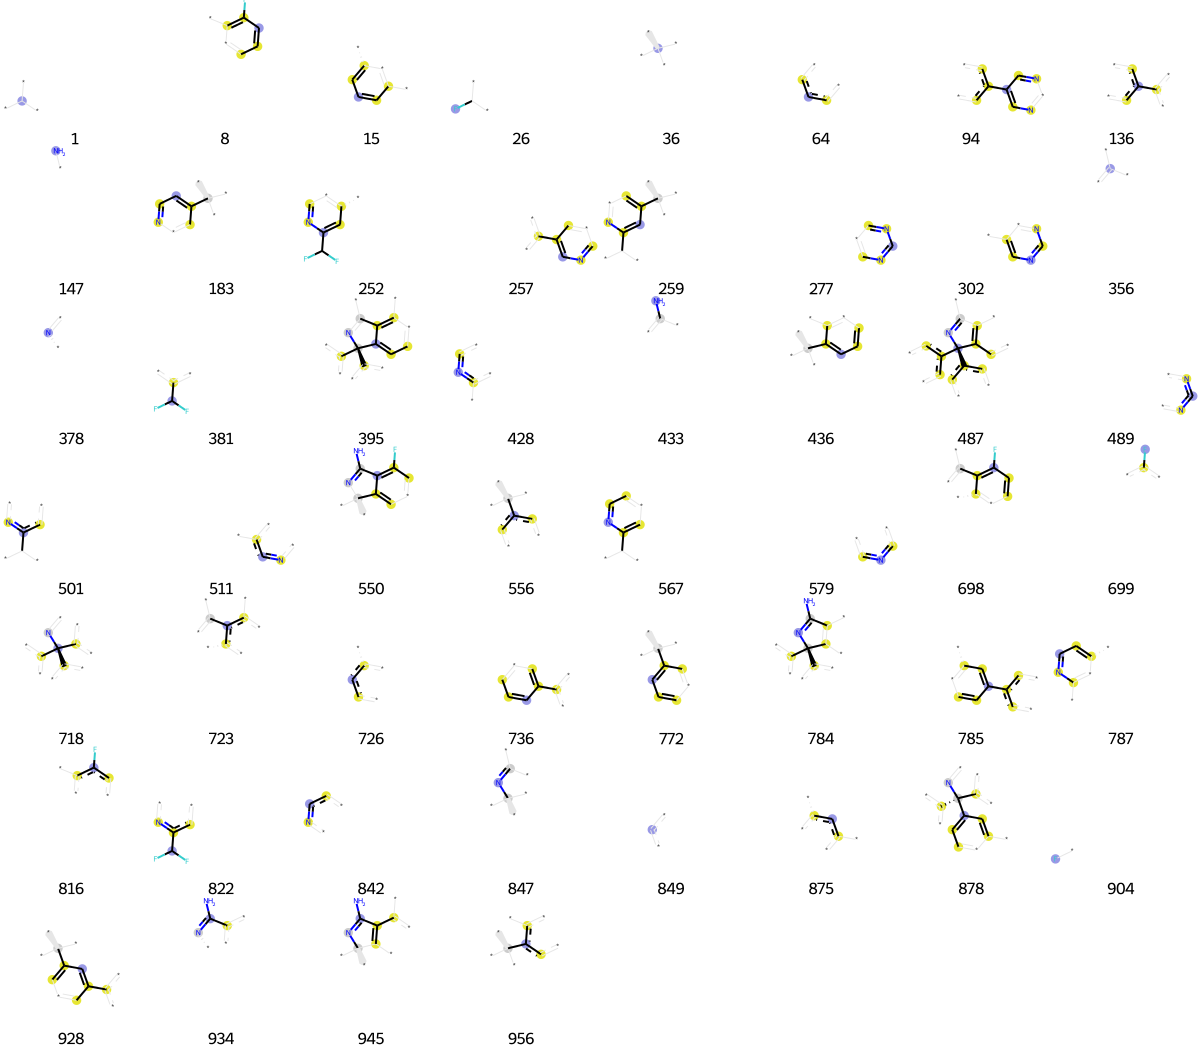

In [1439]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1440]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33, 90, 186, 356, 378, 391, 511, 573, 609, 632, 671, 695, 698, 799, 849, 855]

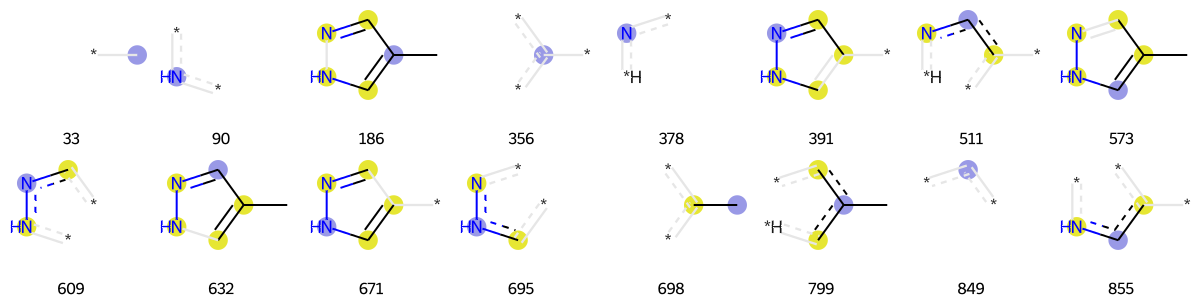

In [1441]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1442]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 5,
 33,
 37,
 64,
 80,
 107,
 113,
 114,
 150,
 175,
 222,
 245,
 271,
 301,
 310,
 319,
 322,
 343,
 350,
 356,
 374,
 389,
 400,
 428,
 446,
 452,
 456,
 492,
 528,
 540,
 559,
 570,
 575,
 610,
 628,
 650,
 654,
 659,
 690,
 695,
 698,
 709,
 713,
 724,
 726,
 730,
 736,
 741,
 745,
 799,
 807,
 835,
 849,
 852,
 875,
 880,
 884,
 893,
 926,
 929,
 935,
 953,
 998,
 1018,
 1019]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


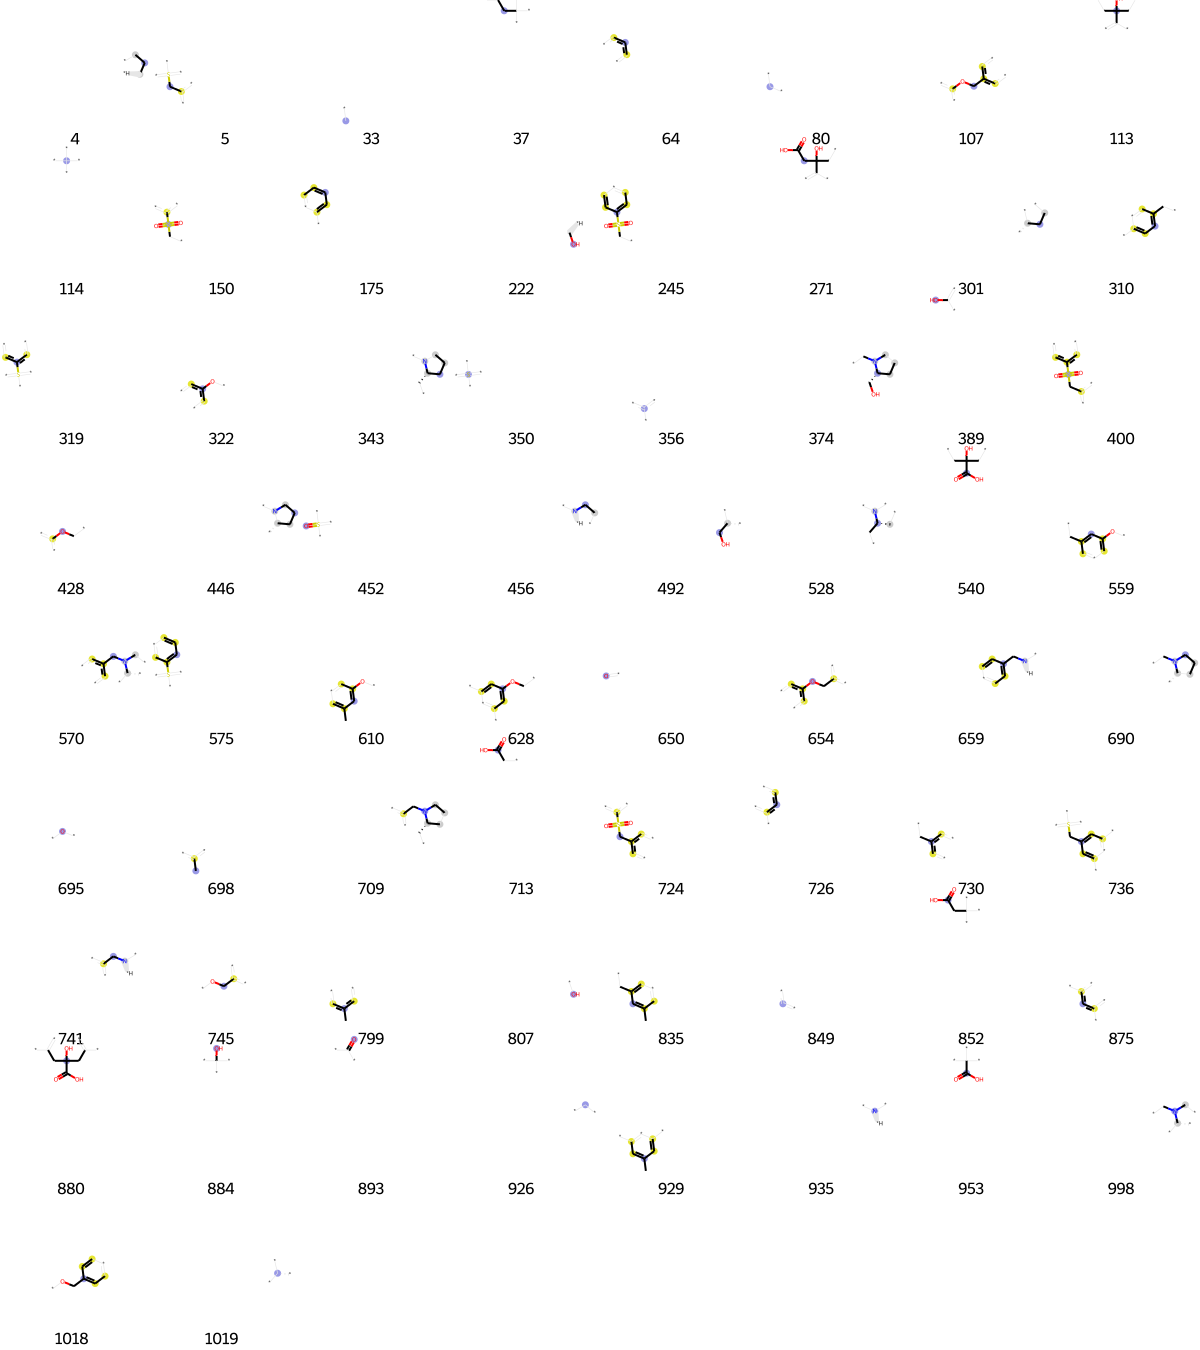

In [1443]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1444]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 33,
 64,
 80,
 89,
 114,
 128,
 175,
 227,
 237,
 269,
 338,
 356,
 366,
 392,
 463,
 554,
 561,
 581,
 592,
 603,
 606,
 659,
 706,
 726,
 807,
 843,
 849,
 974]

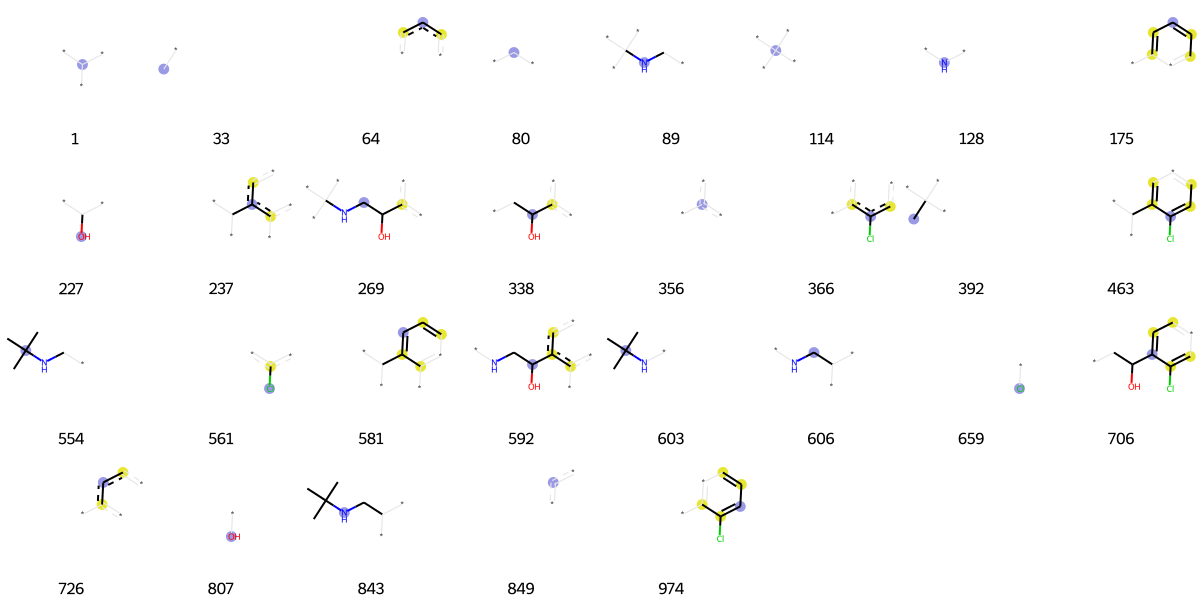

In [1445]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1446]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[33,
 34,
 36,
 50,
 84,
 103,
 112,
 138,
 155,
 157,
 180,
 184,
 185,
 188,
 240,
 250,
 267,
 271,
 272,
 282,
 301,
 314,
 321,
 324,
 356,
 357,
 360,
 363,
 369,
 389,
 412,
 418,
 463,
 478,
 503,
 516,
 519,
 574,
 575,
 600,
 644,
 650,
 674,
 679,
 712,
 715,
 790,
 807,
 849,
 853,
 893,
 899,
 926,
 995,
 1010,
 1019]

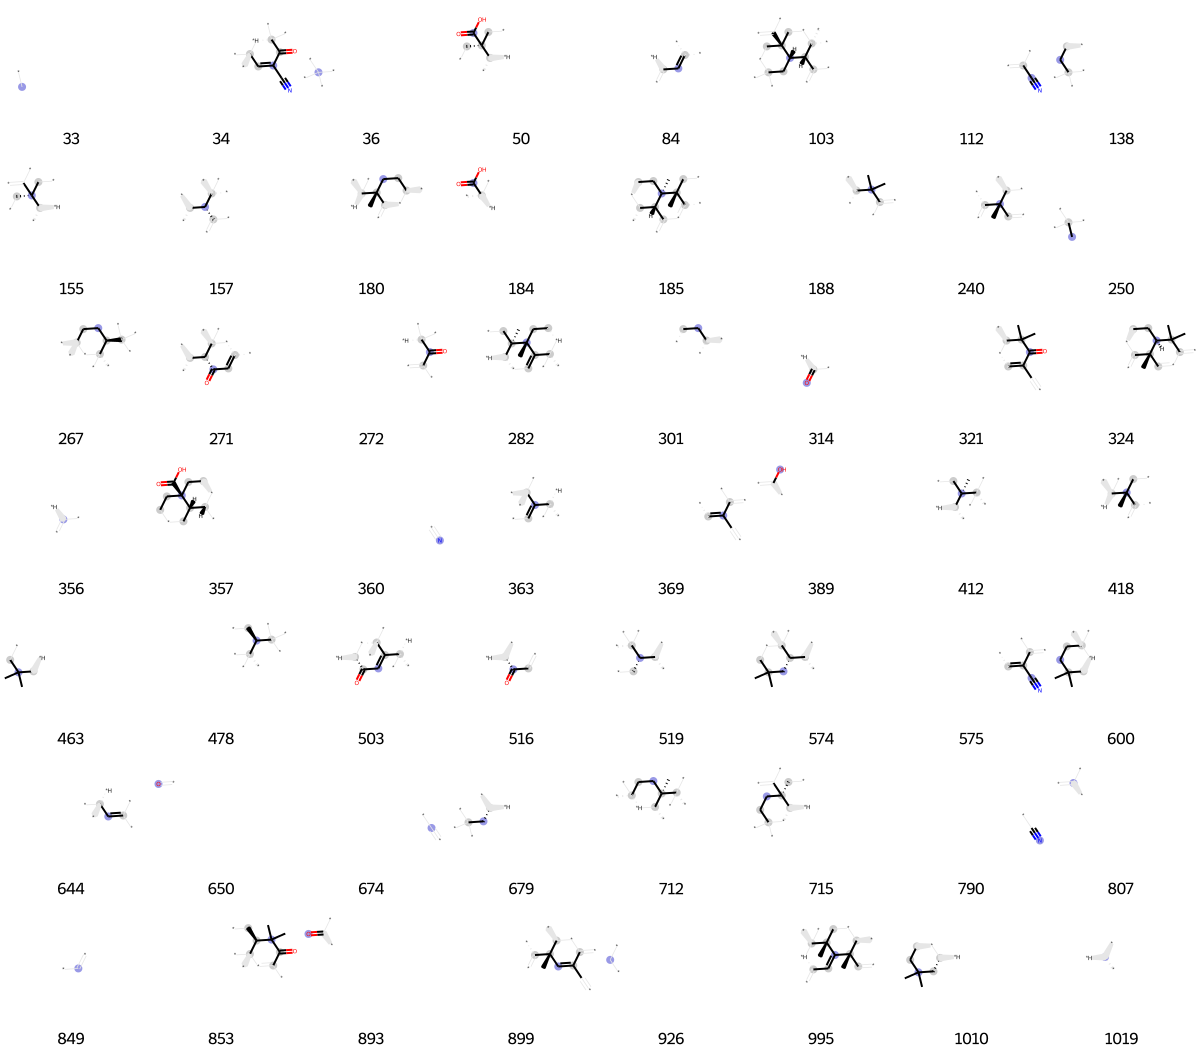

In [1447]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1448]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[4,
 33,
 34,
 80,
 94,
 128,
 147,
 173,
 197,
 235,
 249,
 268,
 293,
 294,
 301,
 319,
 343,
 350,
 356,
 398,
 446,
 452,
 456,
 486,
 512,
 528,
 548,
 580,
 583,
 650,
 676,
 690,
 695,
 715,
 726,
 738,
 807,
 833,
 841,
 849,
 875,
 888,
 893,
 926,
 935,
 946,
 967,
 994,
 998,
 1019]

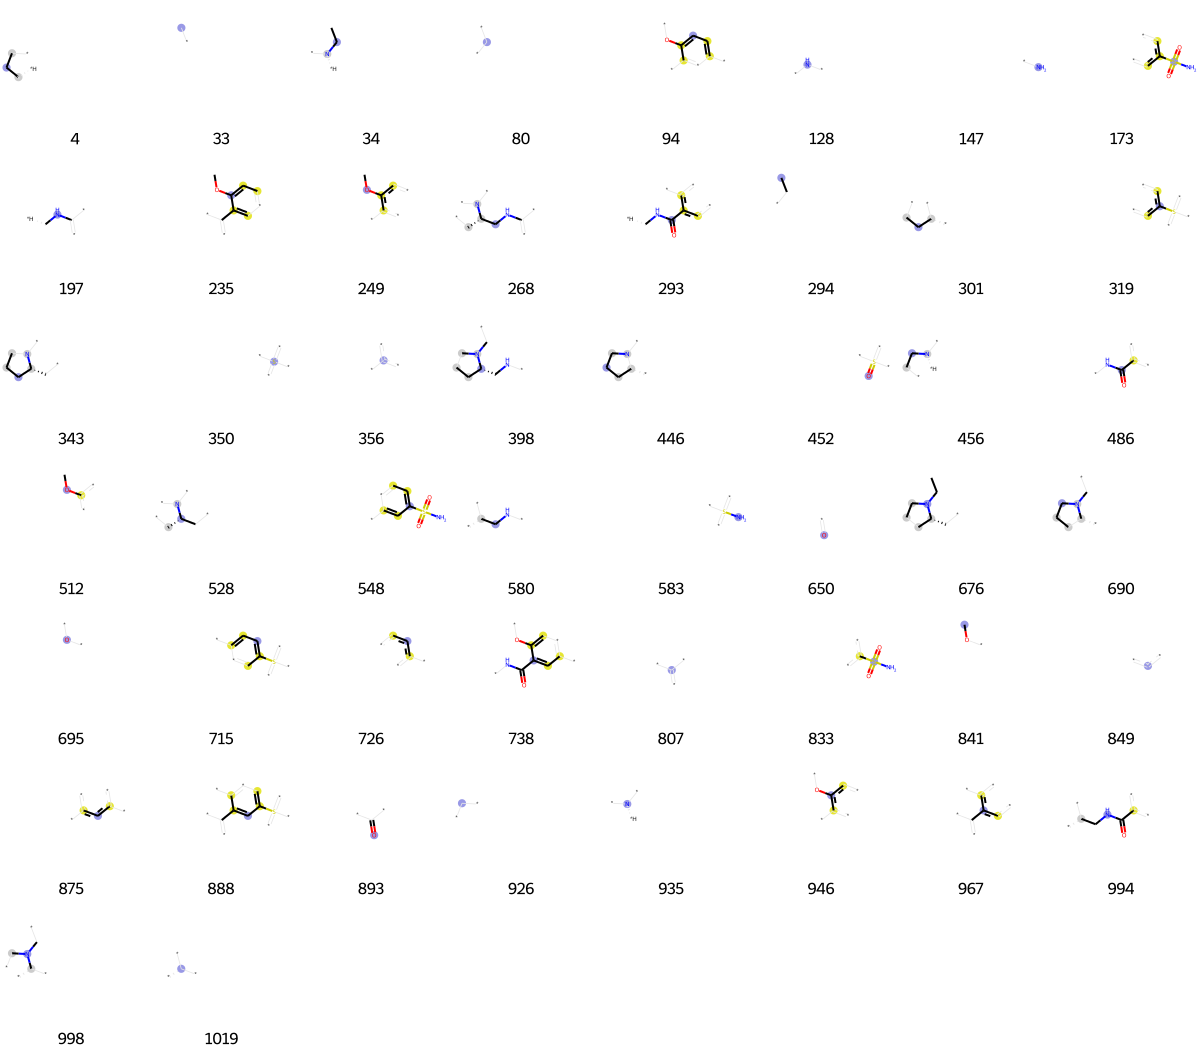

In [1449]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1450]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[12,
 14,
 42,
 64,
 80,
 117,
 175,
 212,
 295,
 325,
 356,
 366,
 453,
 456,
 502,
 543,
 554,
 561,
 573,
 585,
 659,
 675,
 714,
 726,
 741,
 767,
 768,
 842,
 849,
 922,
 926,
 935,
 966,
 974]

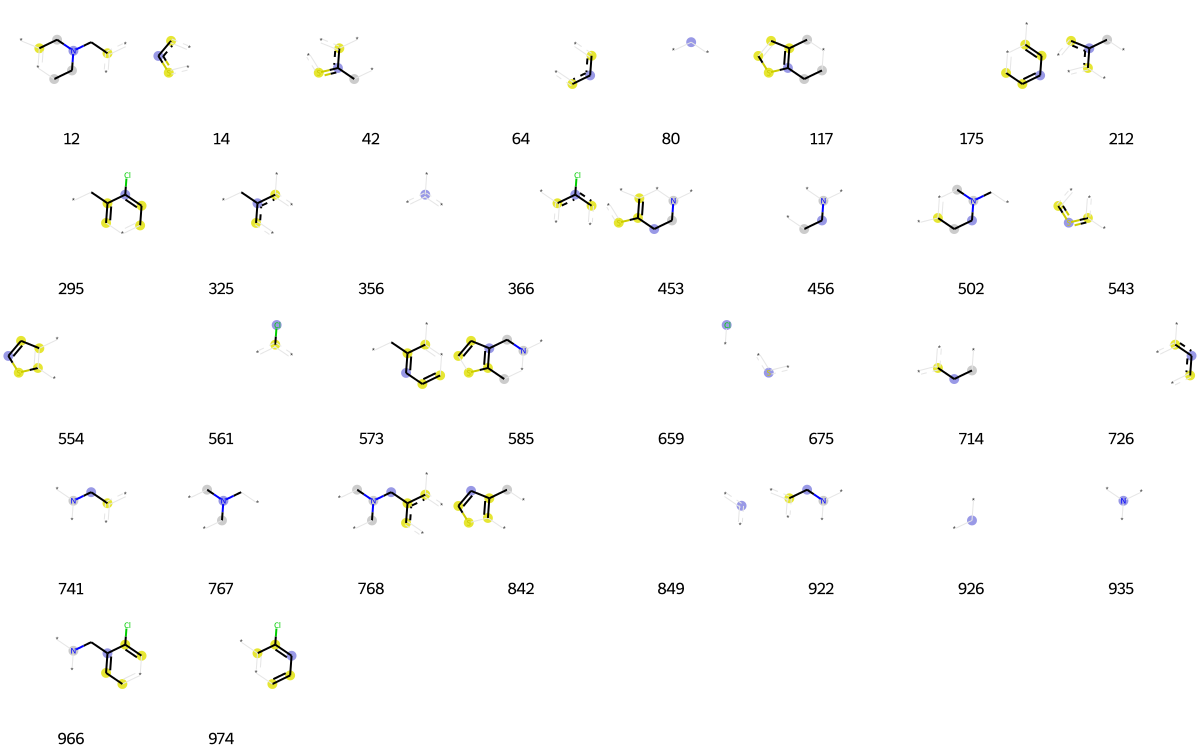

In [1451]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1452]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[14,
 33,
 47,
 73,
 80,
 92,
 128,
 201,
 232,
 243,
 246,
 248,
 315,
 325,
 350,
 356,
 367,
 378,
 392,
 414,
 441,
 448,
 452,
 492,
 502,
 503,
 518,
 526,
 543,
 554,
 561,
 613,
 650,
 656,
 659,
 669,
 675,
 696,
 698,
 726,
 738,
 776,
 781,
 807,
 839,
 849,
 864,
 875,
 881,
 893,
 911,
 916,
 926,
 1011,
 1021]

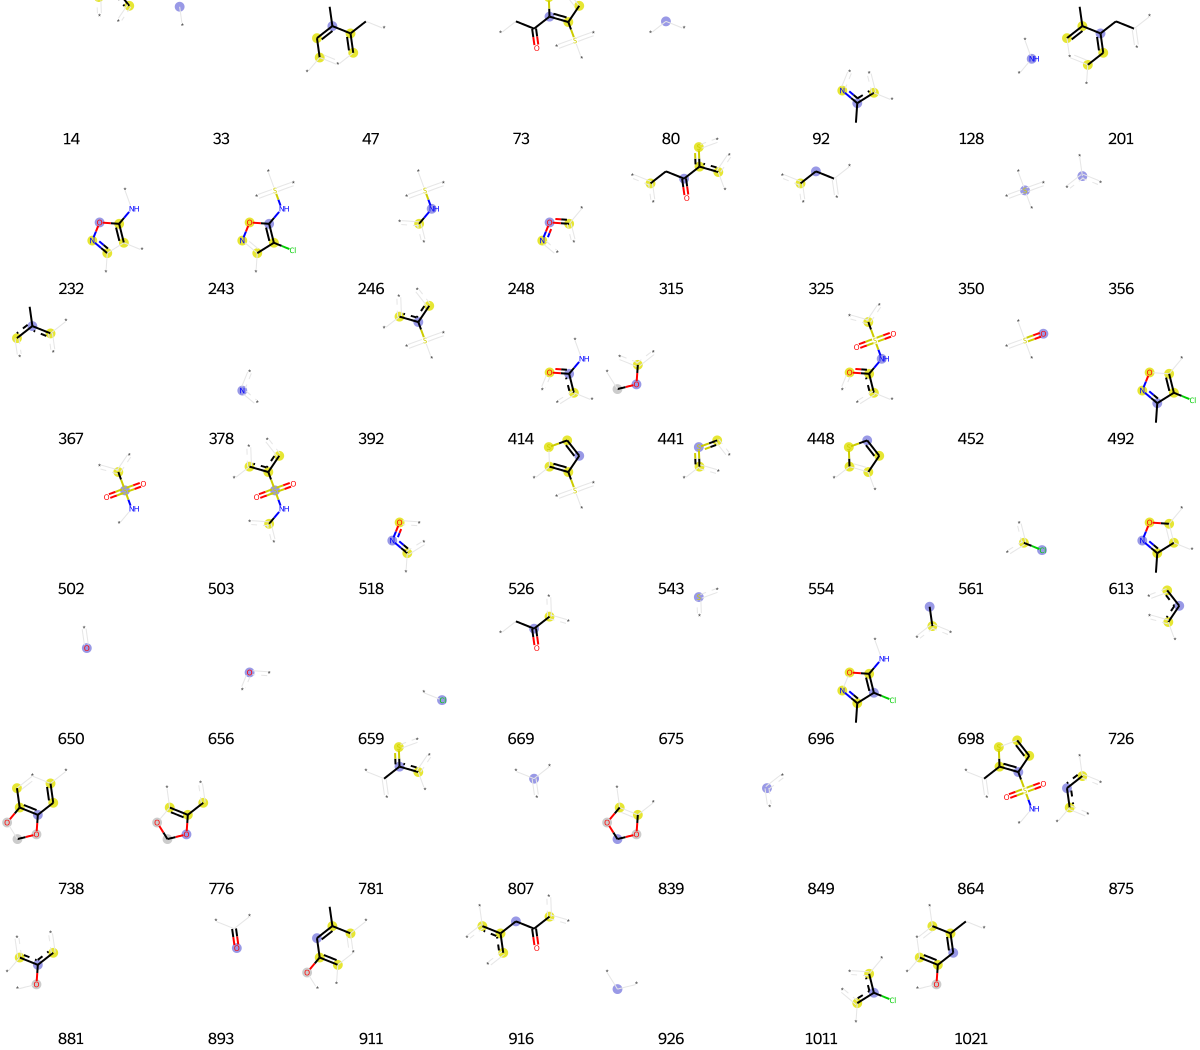

In [1453]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1454]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[4,
 15,
 33,
 56,
 63,
 64,
 90,
 142,
 249,
 284,
 285,
 305,
 350,
 354,
 356,
 373,
 378,
 392,
 452,
 456,
 470,
 511,
 579,
 590,
 649,
 650,
 662,
 688,
 699,
 726,
 733,
 734,
 760,
 794,
 800,
 803,
 816,
 831,
 849,
 897,
 904,
 915,
 926,
 935,
 960,
 992,
 1019]

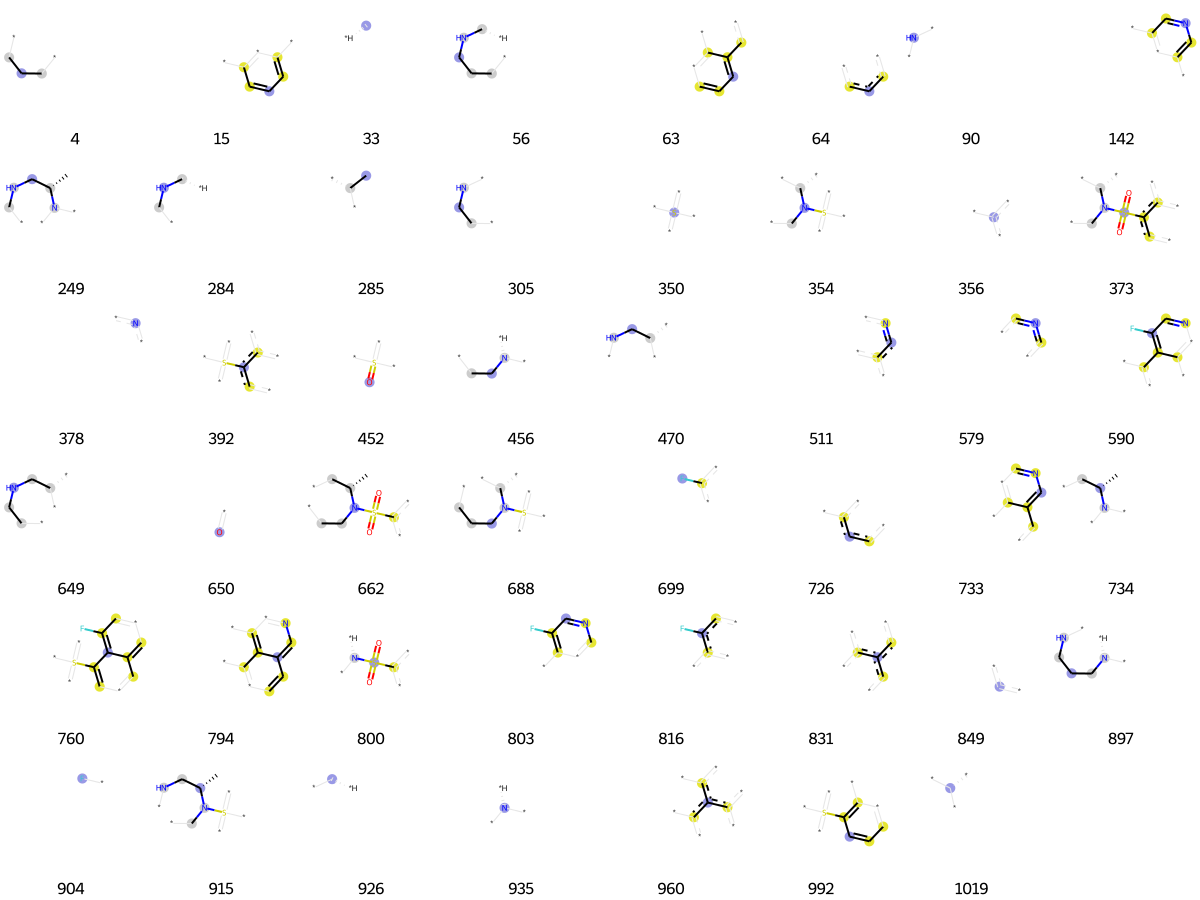

In [1455]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1456]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 80,
 139,
 265,
 267,
 268,
 298,
 310,
 334,
 355,
 356,
 357,
 360,
 378,
 428,
 507,
 511,
 561,
 613,
 659,
 674,
 725,
 726,
 730,
 734,
 735,
 742,
 780,
 790,
 807,
 849,
 881,
 885,
 930,
 976,
 1017]

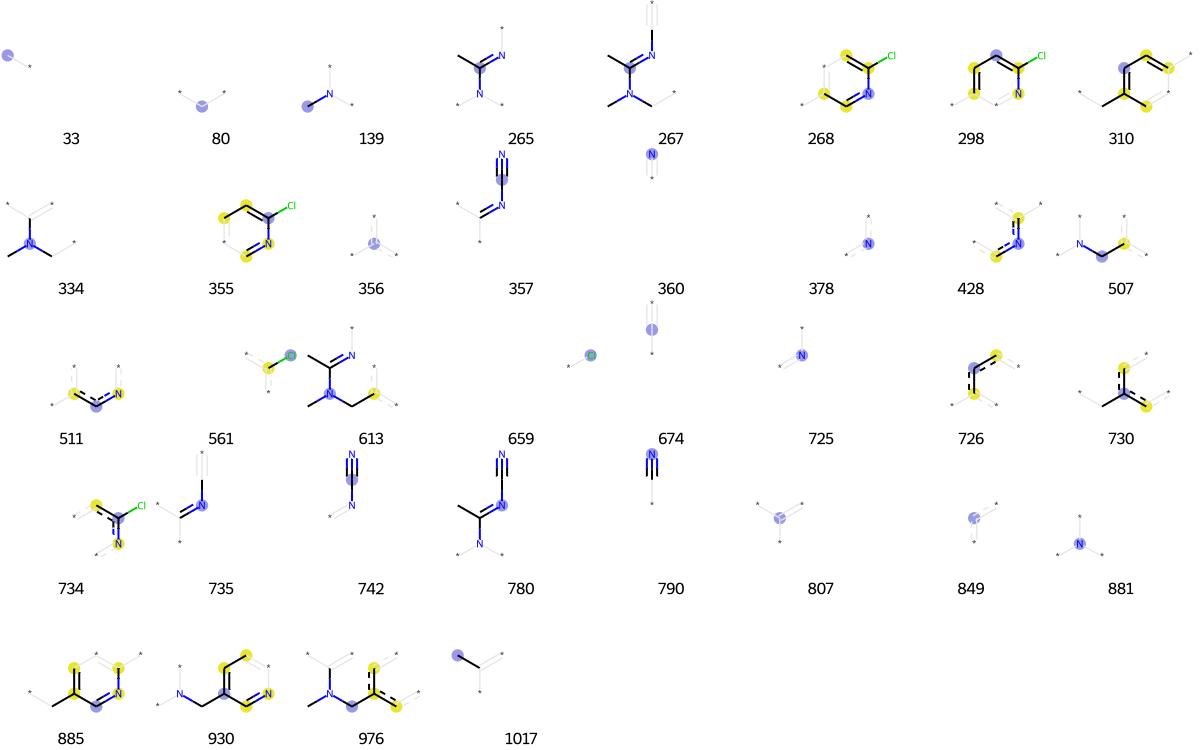

In [1457]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1458]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[42,
 64,
 80,
 102,
 107,
 147,
 173,
 175,
 319,
 322,
 350,
 356,
 389,
 428,
 452,
 465,
 583,
 650,
 654,
 695,
 715,
 718,
 726,
 730,
 745,
 833,
 849,
 1018]

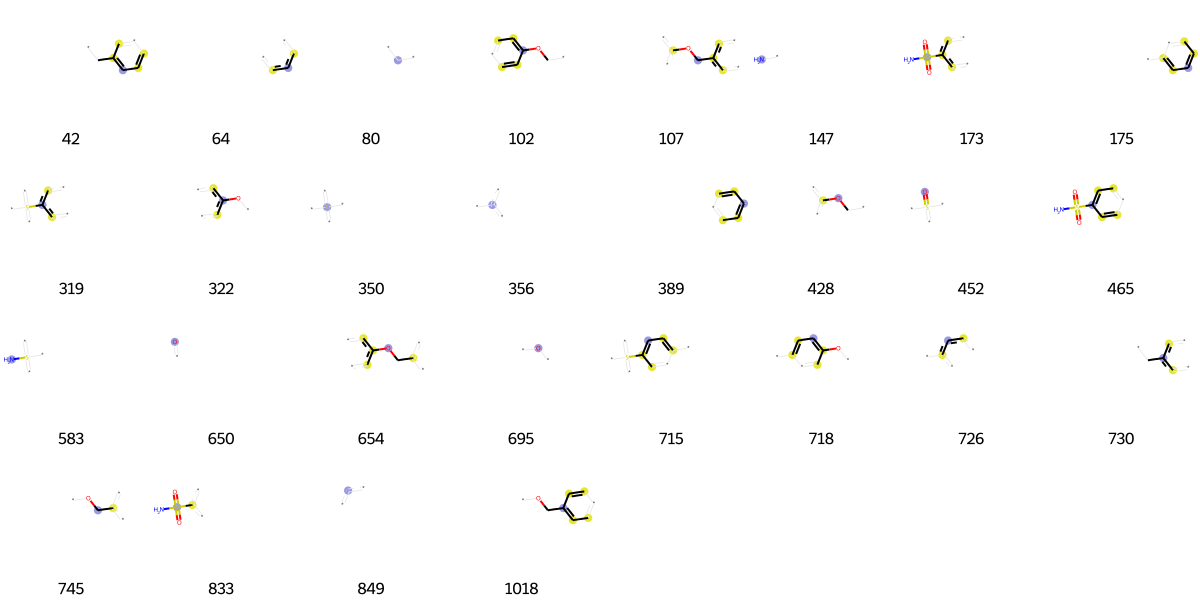

In [1459]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1460]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[19,
 25,
 27,
 32,
 36,
 43,
 64,
 80,
 109,
 116,
 128,
 138,
 175,
 177,
 197,
 206,
 293,
 344,
 356,
 362,
 378,
 381,
 389,
 407,
 423,
 428,
 448,
 456,
 484,
 486,
 498,
 523,
 552,
 563,
 628,
 630,
 650,
 656,
 687,
 703,
 726,
 778,
 800,
 801,
 807,
 811,
 842,
 849,
 855,
 893,
 926,
 935,
 942,
 950,
 967]

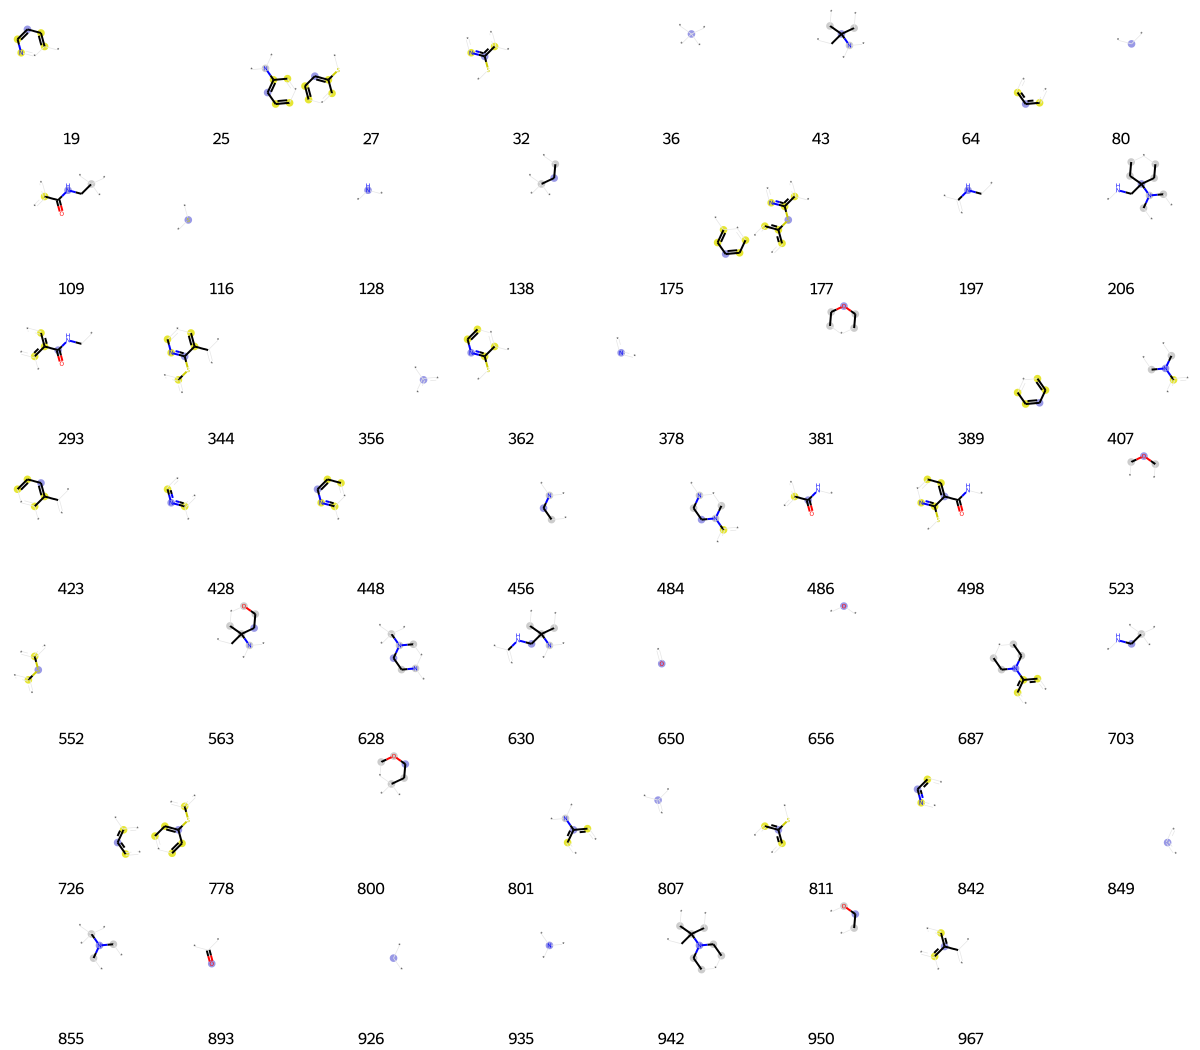

In [1461]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1462]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[15,
 31,
 33,
 64,
 80,
 128,
 141,
 157,
 167,
 197,
 284,
 294,
 327,
 329,
 356,
 485,
 600,
 607,
 650,
 694,
 702,
 726,
 728,
 766,
 807,
 835,
 849,
 875,
 893,
 909,
 942,
 1009,
 1017]

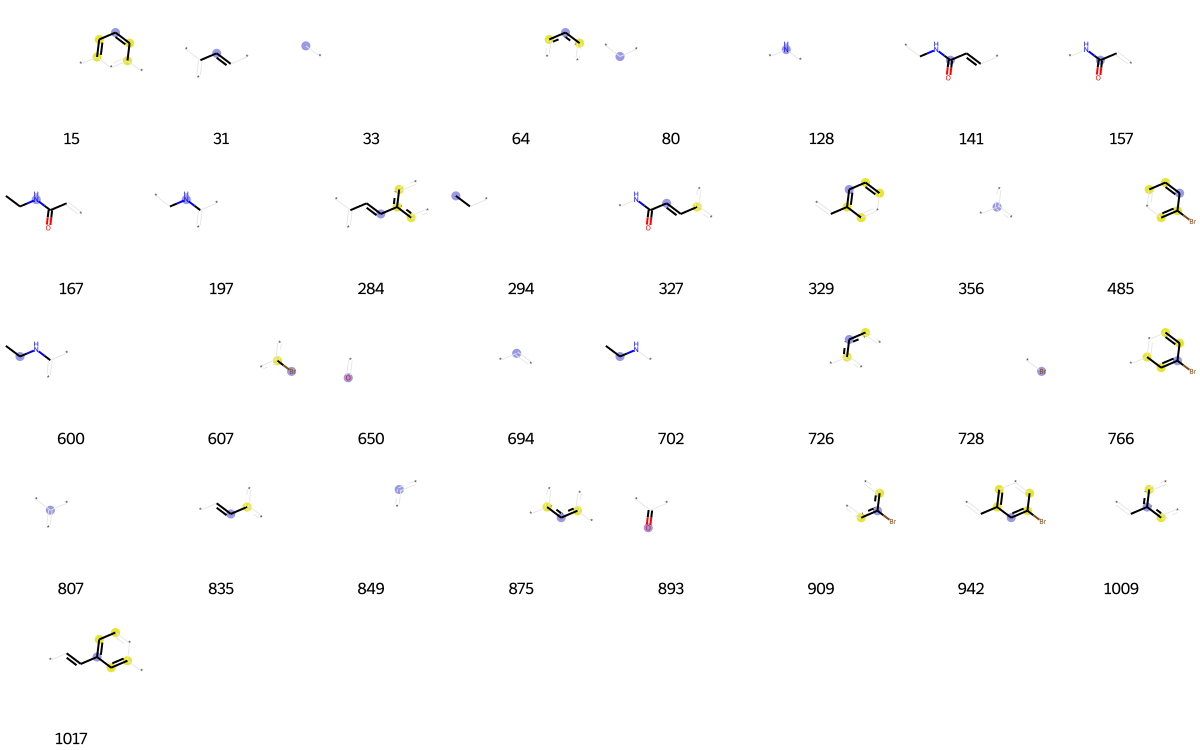

In [1463]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1464]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[19,
 23,
 33,
 36,
 64,
 90,
 130,
 297,
 301,
 314,
 323,
 333,
 338,
 352,
 356,
 367,
 378,
 402,
 426,
 428,
 448,
 456,
 474,
 527,
 561,
 633,
 637,
 650,
 698,
 726,
 764,
 787,
 842,
 849,
 886,
 898,
 926,
 935,
 984,
 1019]

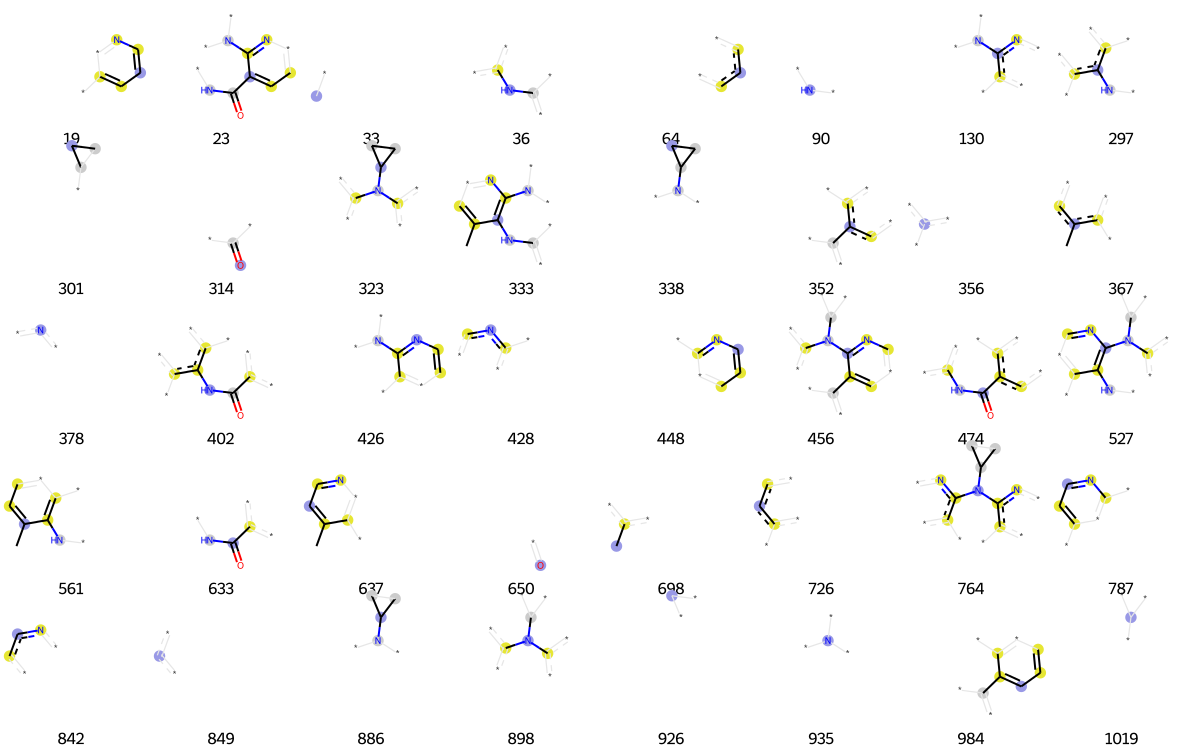

In [1465]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1466]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[80,
 90,
 119,
 144,
 147,
 193,
 219,
 325,
 328,
 332,
 333,
 356,
 364,
 386,
 463,
 476,
 646,
 699,
 726,
 728,
 806,
 816,
 849,
 855,
 875,
 904,
 913,
 915,
 981]

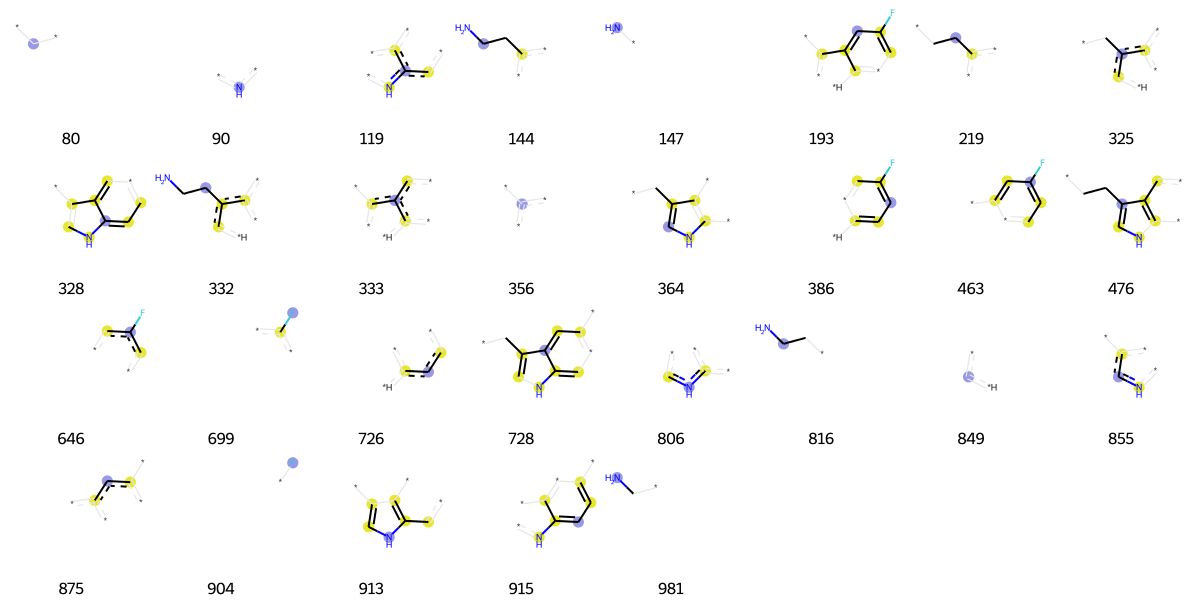

In [1467]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1468]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 33,
 38,
 45,
 62,
 73,
 79,
 80,
 90,
 222,
 227,
 238,
 249,
 260,
 274,
 314,
 323,
 356,
 367,
 369,
 370,
 378,
 482,
 553,
 650,
 657,
 698,
 699,
 706,
 721,
 749,
 750,
 802,
 807,
 829,
 831,
 849,
 875,
 888,
 891,
 898,
 908,
 935,
 966,
 1018]

In [1469]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[15,
 58,
 64,
 73,
 114,
 128,
 156,
 162,
 175,
 289,
 317,
 319,
 356,
 361,
 378,
 385,
 393,
 461,
 486,
 526,
 557,
 624,
 632,
 650,
 659,
 675,
 716,
 726,
 771,
 792,
 803,
 807,
 831,
 849,
 875,
 885,
 893,
 961,
 974,
 980,
 993]

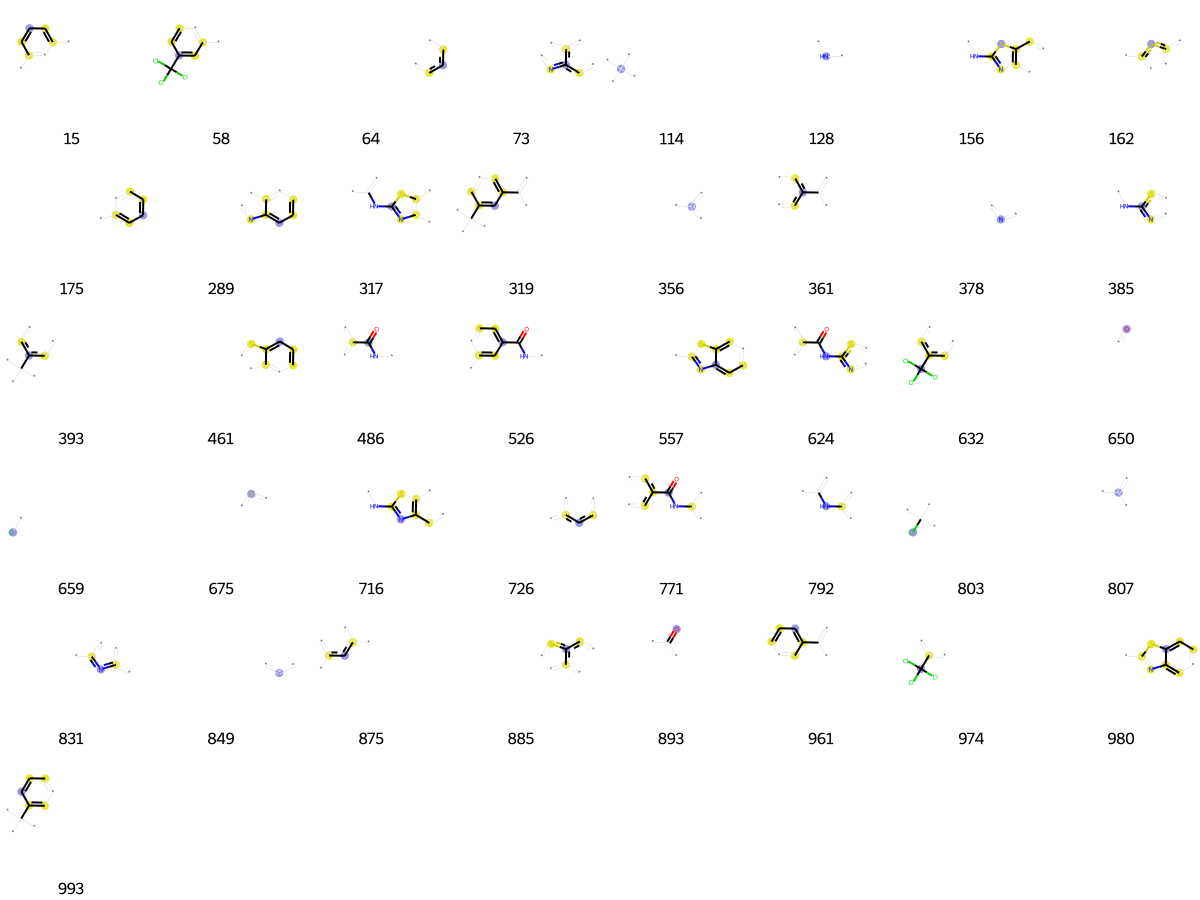

In [1470]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1471]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[3,
 15,
 25,
 33,
 36,
 64,
 90,
 215,
 273,
 281,
 314,
 322,
 329,
 356,
 358,
 424,
 466,
 512,
 531,
 562,
 633,
 650,
 675,
 694,
 695,
 726,
 749,
 781,
 841,
 849,
 875,
 926,
 948,
 1009,
 1020]

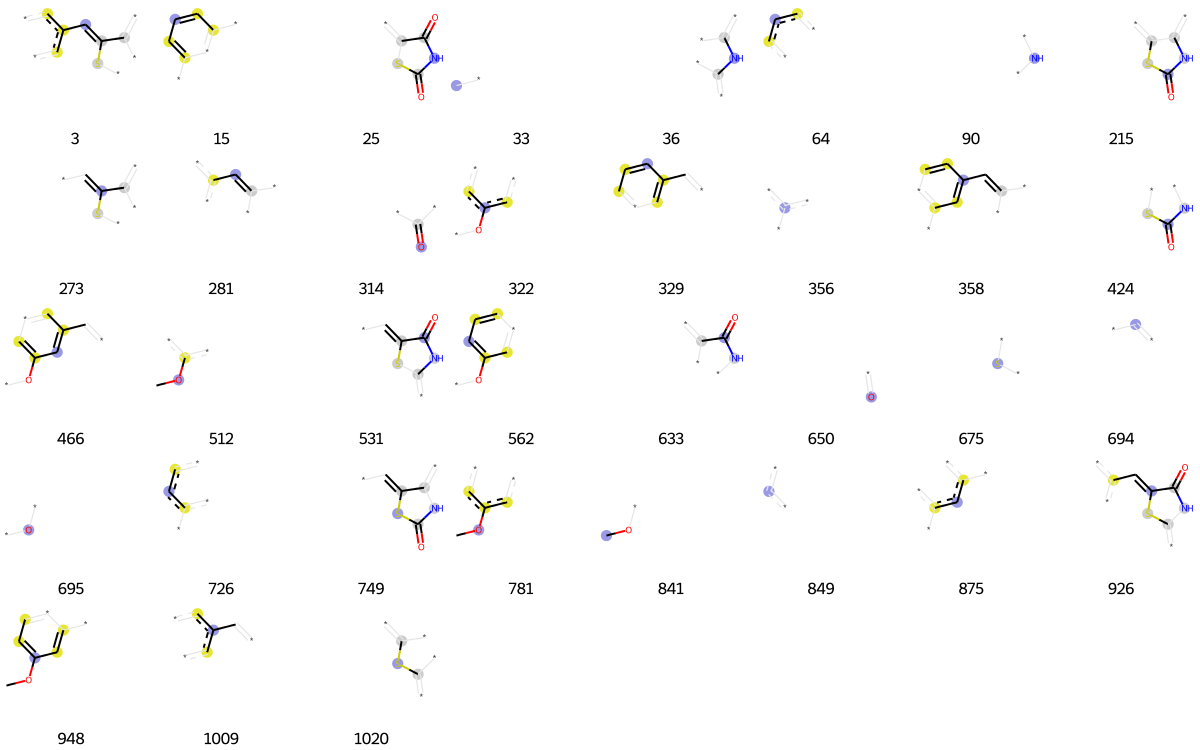

In [1472]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1473]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 4,
 33,
 80,
 102,
 118,
 128,
 140,
 147,
 169,
 227,
 235,
 283,
 310,
 322,
 325,
 356,
 421,
 428,
 430,
 550,
 606,
 650,
 658,
 695,
 718,
 726,
 730,
 782,
 791,
 807,
 849,
 874,
 893,
 913,
 1006,
 1014]

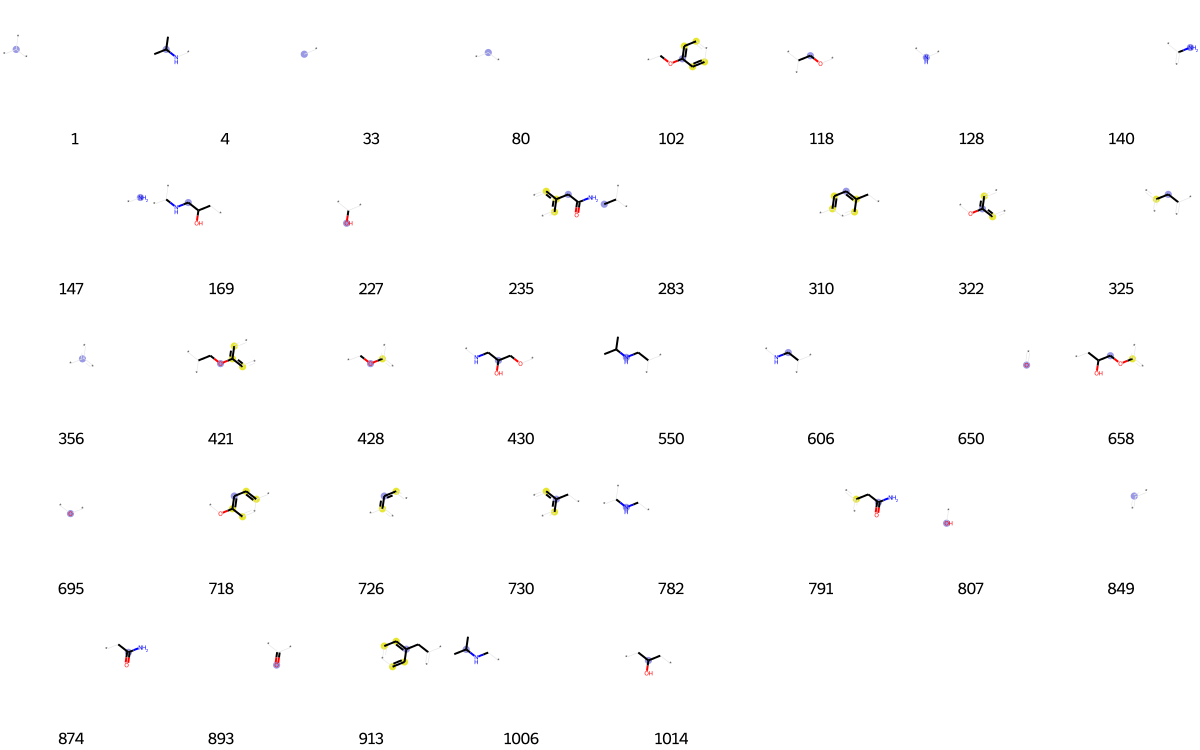

In [1474]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1475]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[80,
 82,
 140,
 147,
 224,
 233,
 237,
 277,
 288,
 301,
 307,
 338,
 356,
 361,
 381,
 389,
 407,
 440,
 456,
 484,
 558,
 621,
 623,
 650,
 673,
 687,
 712,
 713,
 726,
 767,
 801,
 807,
 830,
 847,
 849,
 886,
 893,
 926,
 935,
 1019]

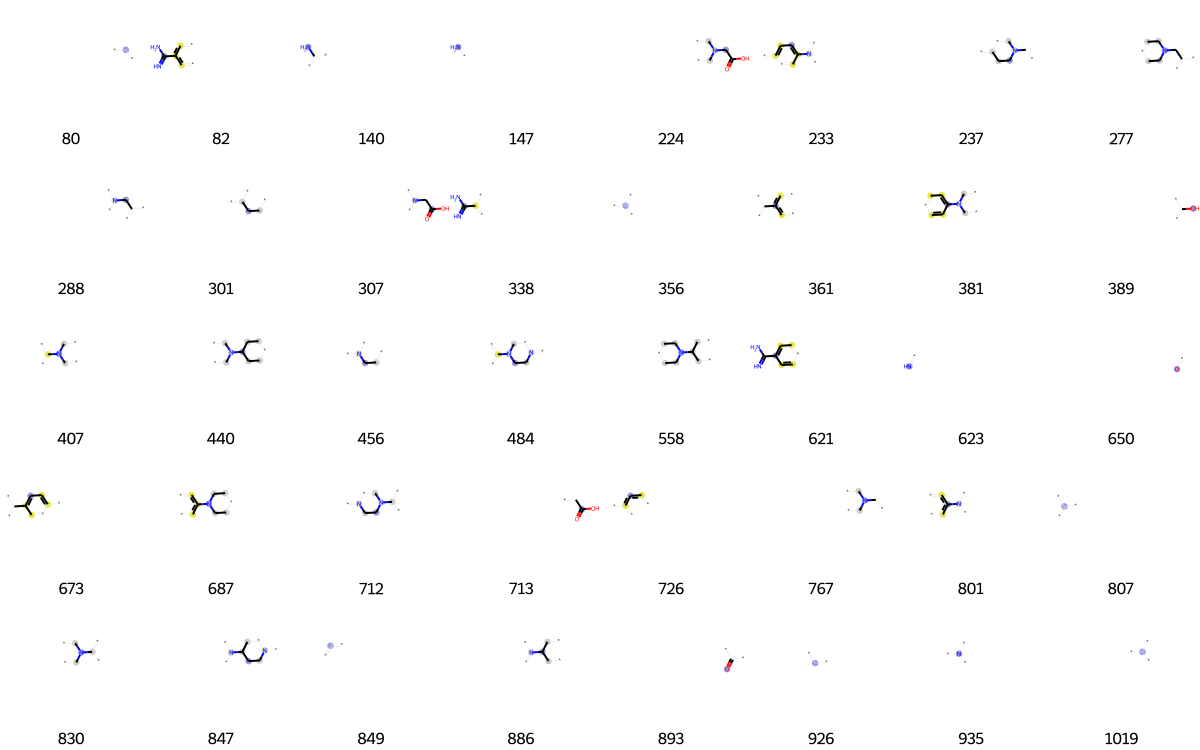

In [1476]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1477]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[9,
 10,
 13,
 33,
 67,
 80,
 119,
 133,
 139,
 212,
 225,
 259,
 305,
 322,
 342,
 345,
 356,
 361,
 406,
 428,
 477,
 506,
 607,
 621,
 625,
 636,
 645,
 650,
 673,
 694,
 695,
 699,
 718,
 726,
 728,
 751,
 764,
 790,
 807,
 816,
 849,
 875,
 881,
 887,
 893,
 904,
 909,
 927,
 940,
 967,
 976]

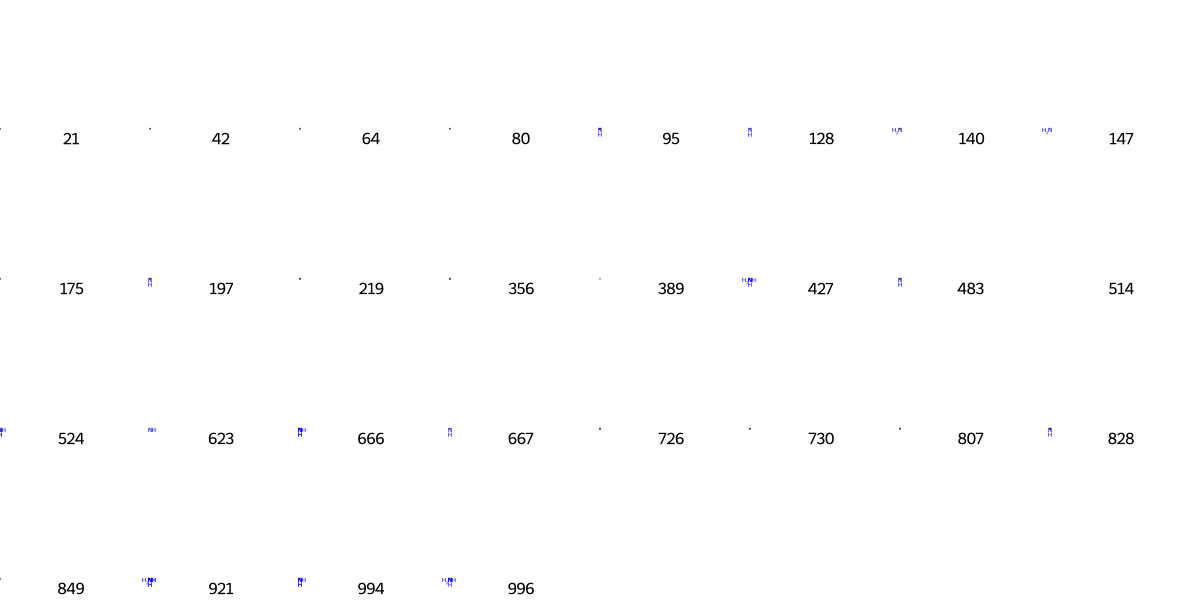

In [1478]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1479]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[0,
 1,
 41,
 69,
 80,
 116,
 117,
 128,
 147,
 173,
 189,
 197,
 283,
 339,
 342,
 389,
 390,
 403,
 416,
 486,
 540,
 551,
 573,
 650,
 713,
 736,
 739,
 767,
 786,
 807,
 820,
 825,
 875,
 893,
 895,
 900]

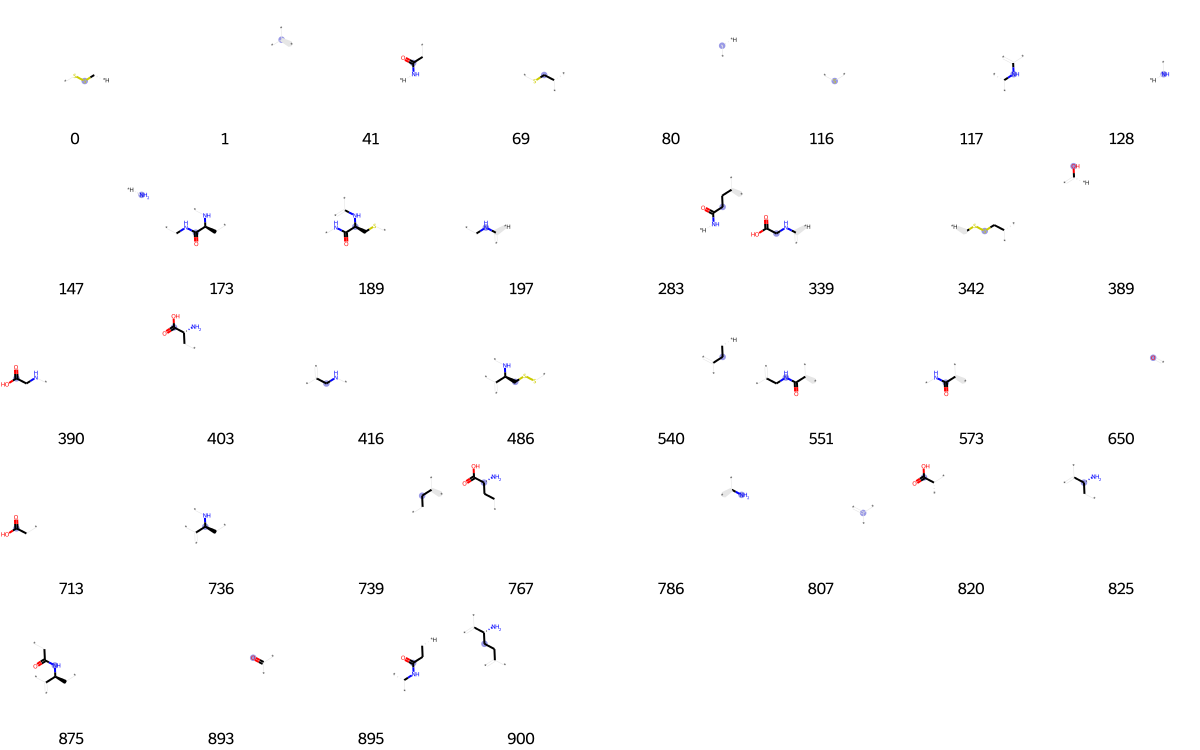

In [1480]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1481]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[13,
 33,
 36,
 42,
 80,
 114,
 119,
 138,
 139,
 225,
 250,
 285,
 294,
 315,
 353,
 356,
 361,
 378,
 389,
 420,
 428,
 456,
 479,
 494,
 511,
 565,
 591,
 650,
 695,
 699,
 718,
 744,
 788,
 794,
 807,
 849,
 875,
 881,
 887,
 893,
 926,
 930,
 946,
 949,
 953,
 956,
 993,
 994]

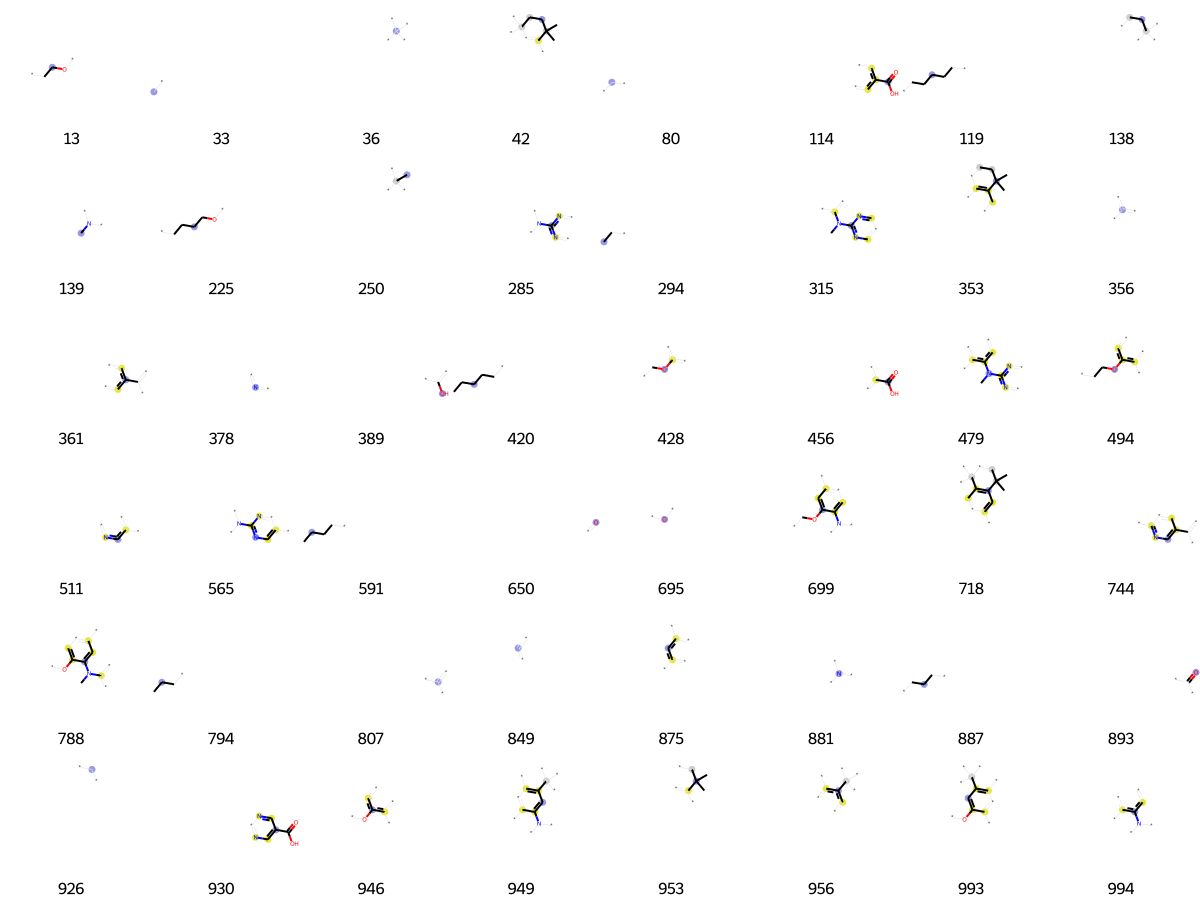

In [1482]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1483]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[54,
 68,
 157,
 167,
 171,
 202,
 218,
 285,
 289,
 314,
 352,
 356,
 381,
 472,
 501,
 525,
 578,
 580,
 583,
 650,
 656,
 680,
 726,
 745,
 784,
 807,
 849,
 875,
 897,
 960,
 1004]

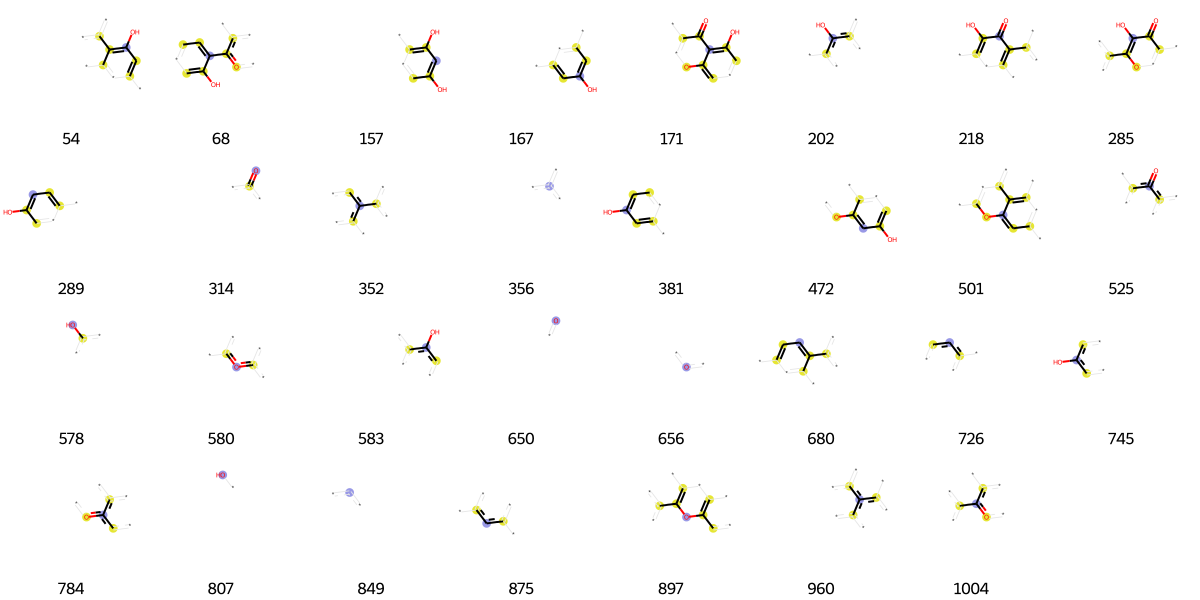

In [1484]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1485]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[19,
 40,
 41,
 64,
 80,
 119,
 128,
 191,
 238,
 243,
 356,
 358,
 378,
 437,
 511,
 540,
 562,
 579,
 607,
 650,
 694,
 703,
 726,
 792,
 807,
 842,
 849,
 860,
 878,
 887,
 893,
 901,
 955]

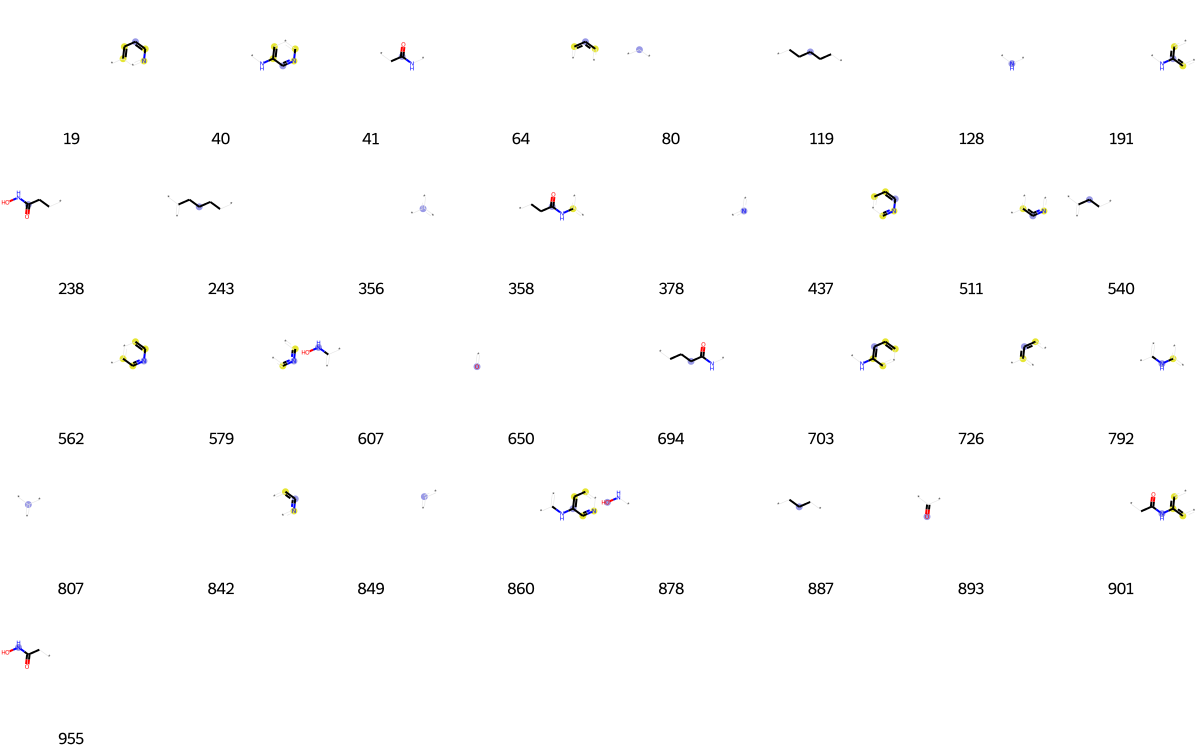

In [1486]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1487]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[33,
 41,
 64,
 80,
 90,
 119,
 128,
 137,
 139,
 166,
 175,
 184,
 191,
 268,
 275,
 314,
 333,
 356,
 514,
 535,
 549,
 650,
 652,
 720,
 721,
 726,
 750,
 792,
 807,
 830,
 843,
 849,
 875,
 881,
 893,
 901,
 906,
 915,
 922,
 978,
 1002]

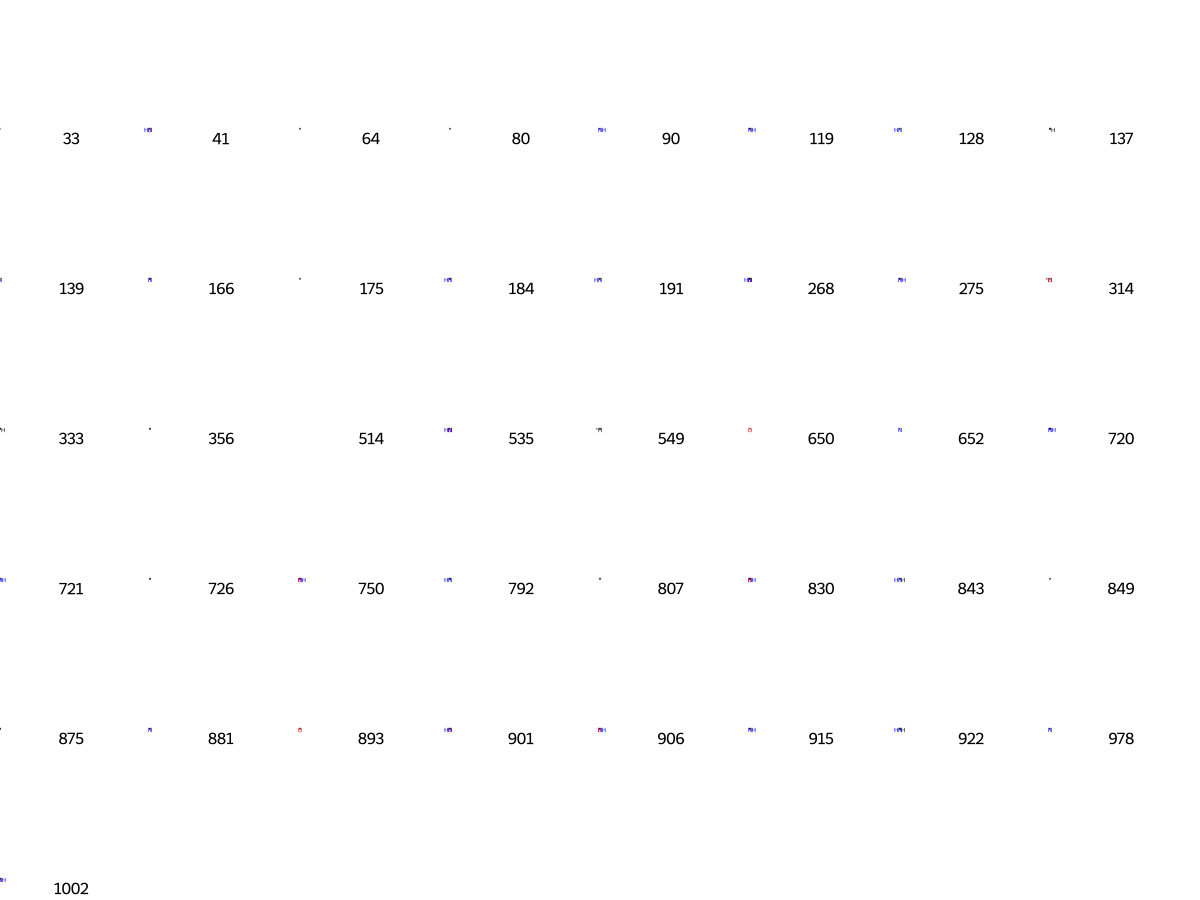

In [1488]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1489]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 9,
 23,
 65,
 80,
 90,
 99,
 114,
 191,
 268,
 287,
 314,
 335,
 356,
 456,
 514,
 561,
 591,
 623,
 650,
 659,
 667,
 714,
 721,
 741,
 750,
 753,
 768,
 769,
 819,
 907,
 926,
 935,
 980,
 1011]

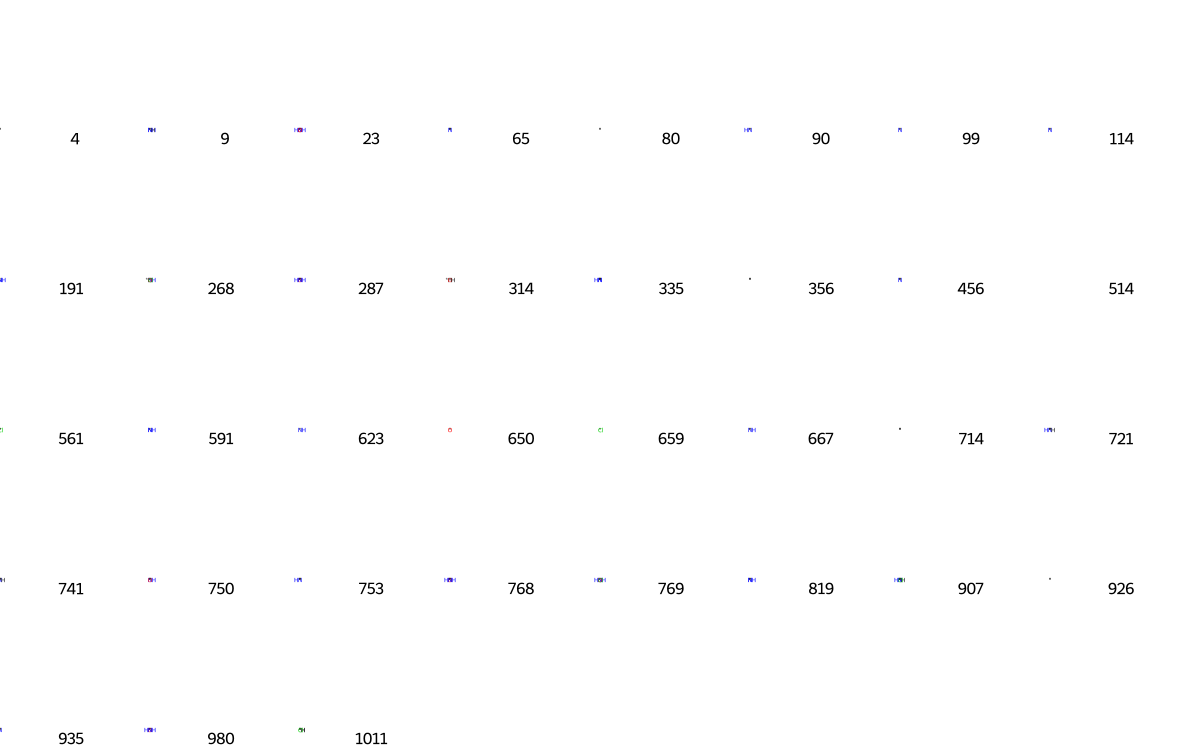

In [1490]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1491]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 23,
 33,
 34,
 64,
 102,
 112,
 136,
 140,
 150,
 175,
 192,
 201,
 252,
 258,
 266,
 271,
 305,
 319,
 343,
 350,
 356,
 360,
 366,
 378,
 409,
 413,
 428,
 452,
 484,
 508,
 511,
 523,
 561,
 580,
 584,
 623,
 634,
 643,
 650,
 656,
 659,
 674,
 692,
 694,
 698,
 700,
 705,
 715,
 720,
 722,
 726,
 790,
 835,
 849,
 890,
 896,
 930,
 935,
 948,
 969,
 974,
 980]

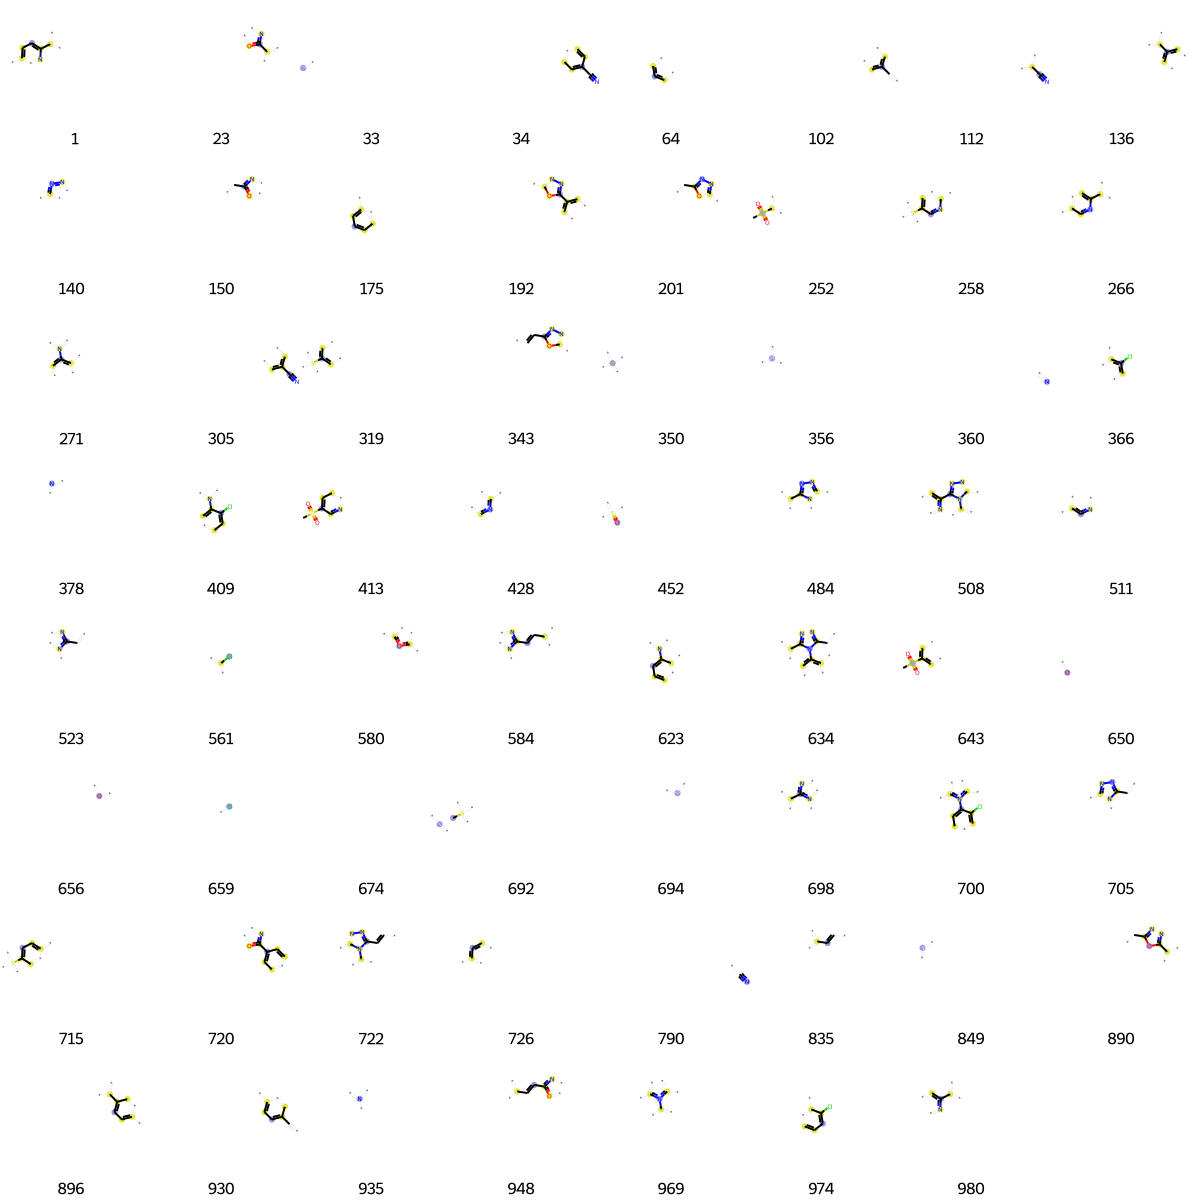

In [1492]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1493]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 10,
 13,
 15,
 33,
 56,
 64,
 80,
 102,
 114,
 121,
 128,
 191,
 198,
 319,
 322,
 329,
 342,
 347,
 350,
 356,
 367,
 378,
 392,
 398,
 428,
 452,
 456,
 458,
 491,
 500,
 502,
 511,
 533,
 544,
 558,
 562,
 575,
 576,
 600,
 603,
 650,
 695,
 698,
 703,
 708,
 718,
 722,
 726,
 767,
 772,
 808,
 831,
 843,
 849,
 875,
 888,
 895,
 926,
 935,
 941,
 974]

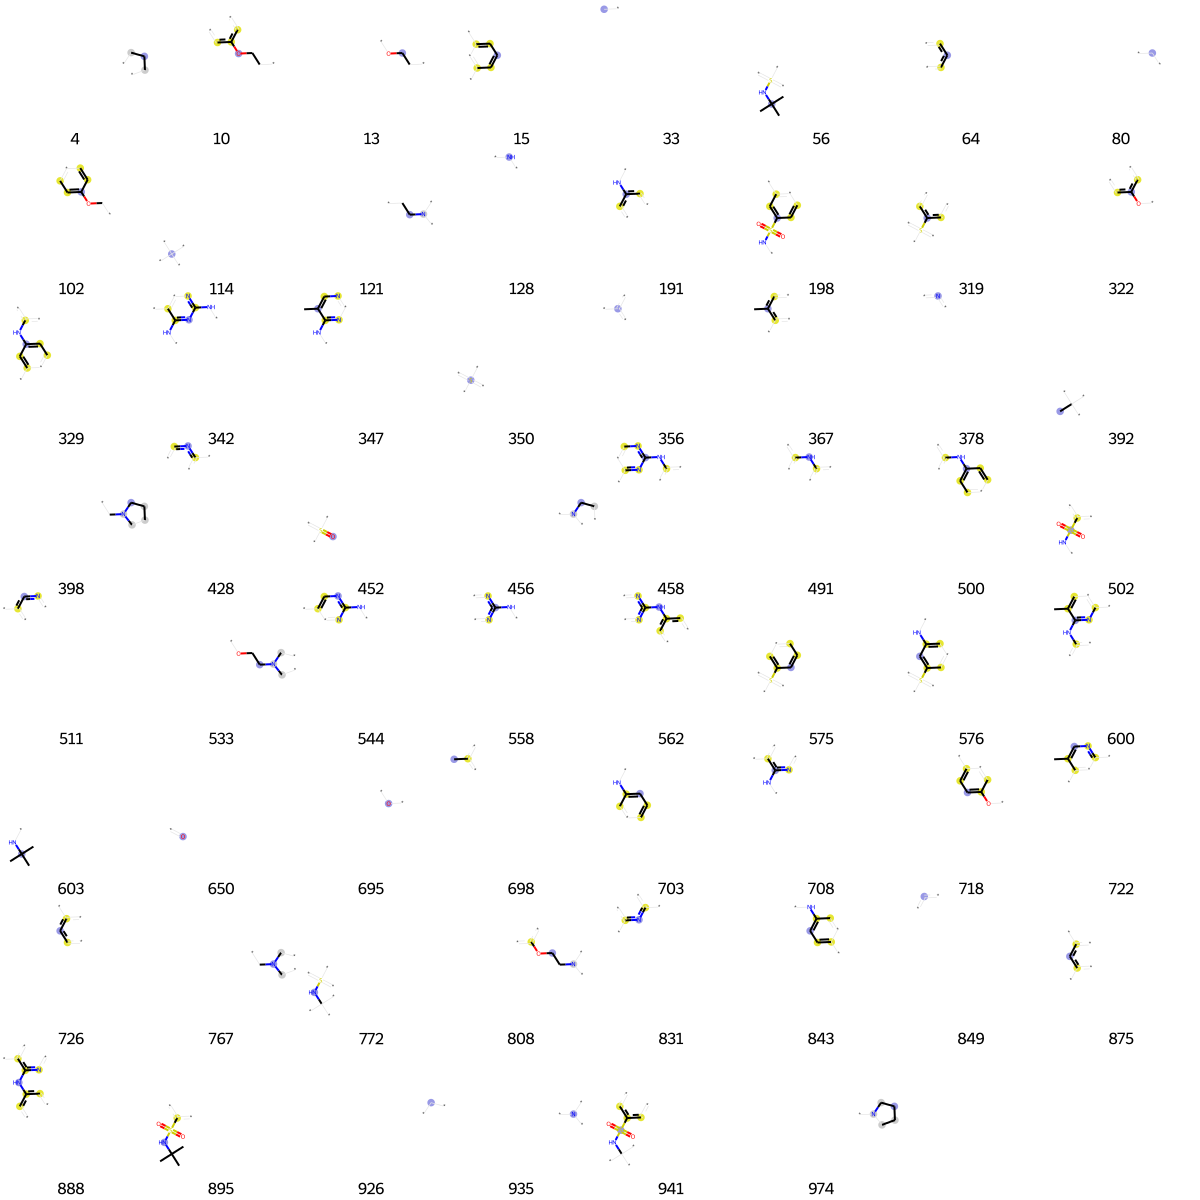

In [1494]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1495]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[9,
 14,
 16,
 33,
 64,
 73,
 79,
 90,
 119,
 128,
 170,
 241,
 343,
 356,
 361,
 373,
 378,
 383,
 419,
 444,
 543,
 594,
 650,
 673,
 675,
 695,
 721,
 726,
 734,
 767,
 790,
 792,
 807,
 831,
 841,
 849,
 875,
 884,
 893,
 915,
 933,
 961,
 974,
 1011]

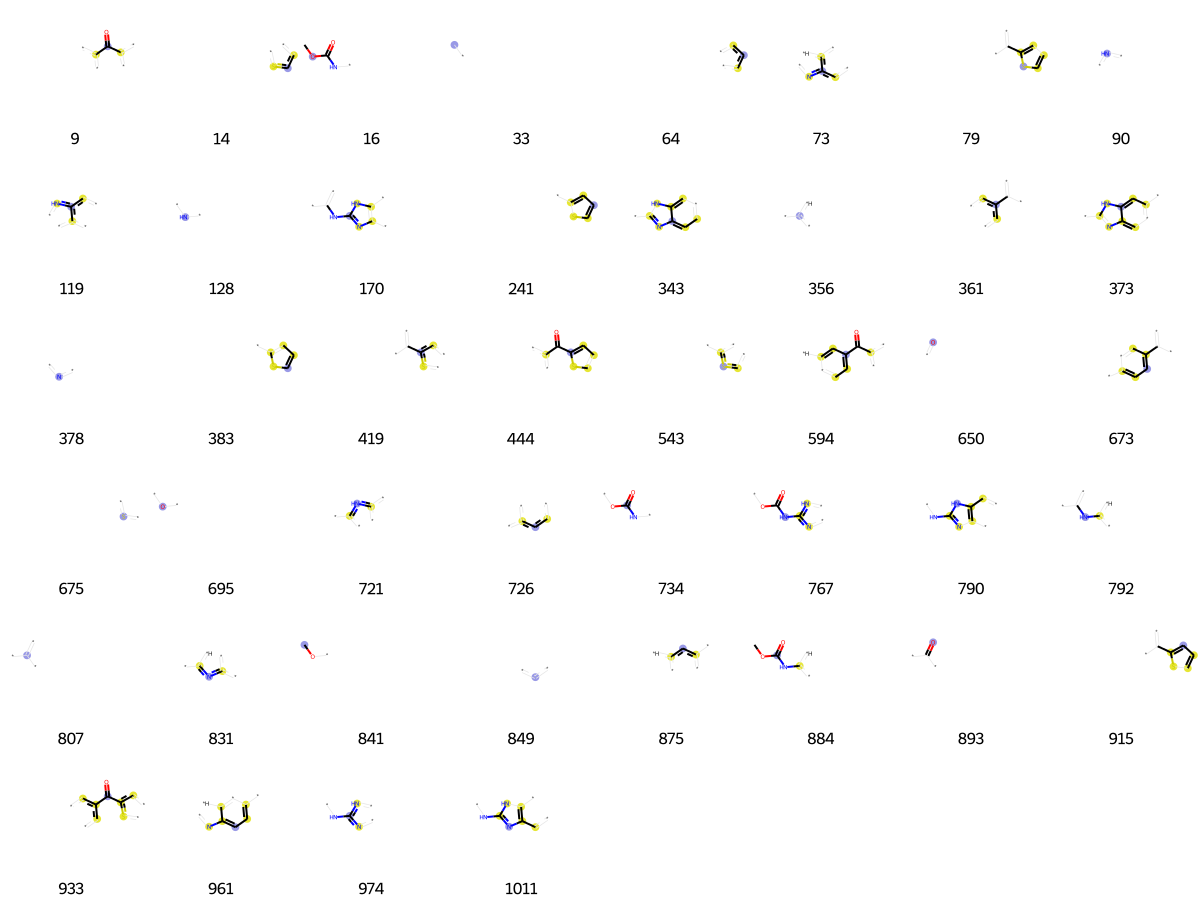

In [1496]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1497]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[18,
 33,
 84,
 126,
 136,
 147,
 164,
 189,
 202,
 249,
 275,
 333,
 350,
 356,
 392,
 433,
 452,
 471,
 512,
 578,
 592,
 626,
 628,
 650,
 652,
 686,
 695,
 709,
 711,
 725,
 726,
 760,
 785,
 807,
 836,
 838,
 841,
 845,
 849,
 875,
 896,
 931,
 946,
 958,
 960]

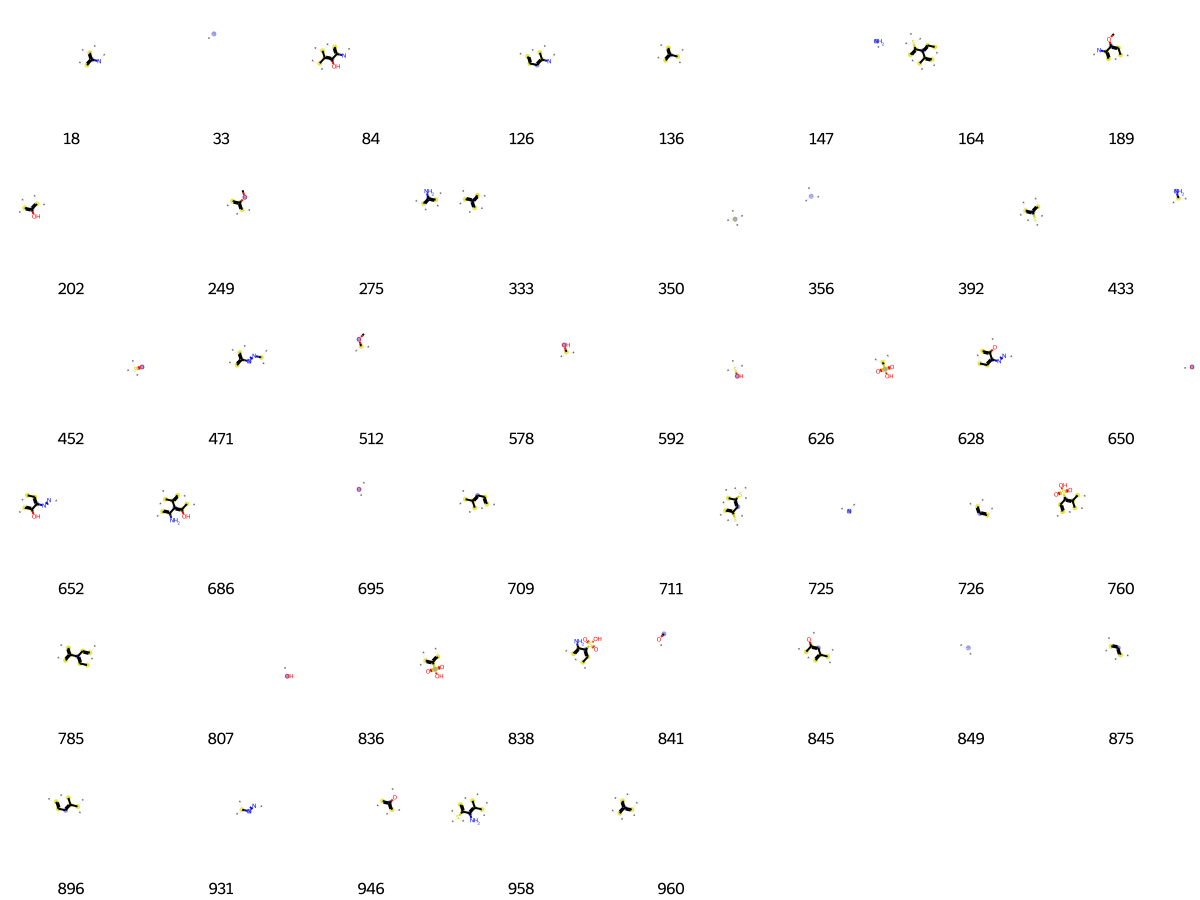

In [1498]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1499]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[3,
 31,
 33,
 36,
 64,
 90,
 107,
 175,
 212,
 231,
 237,
 250,
 284,
 297,
 356,
 369,
 371,
 378,
 389,
 436,
 460,
 508,
 546,
 650,
 670,
 673,
 684,
 694,
 726,
 752,
 807,
 840,
 849,
 893,
 926,
 956,
 976,
 1019]

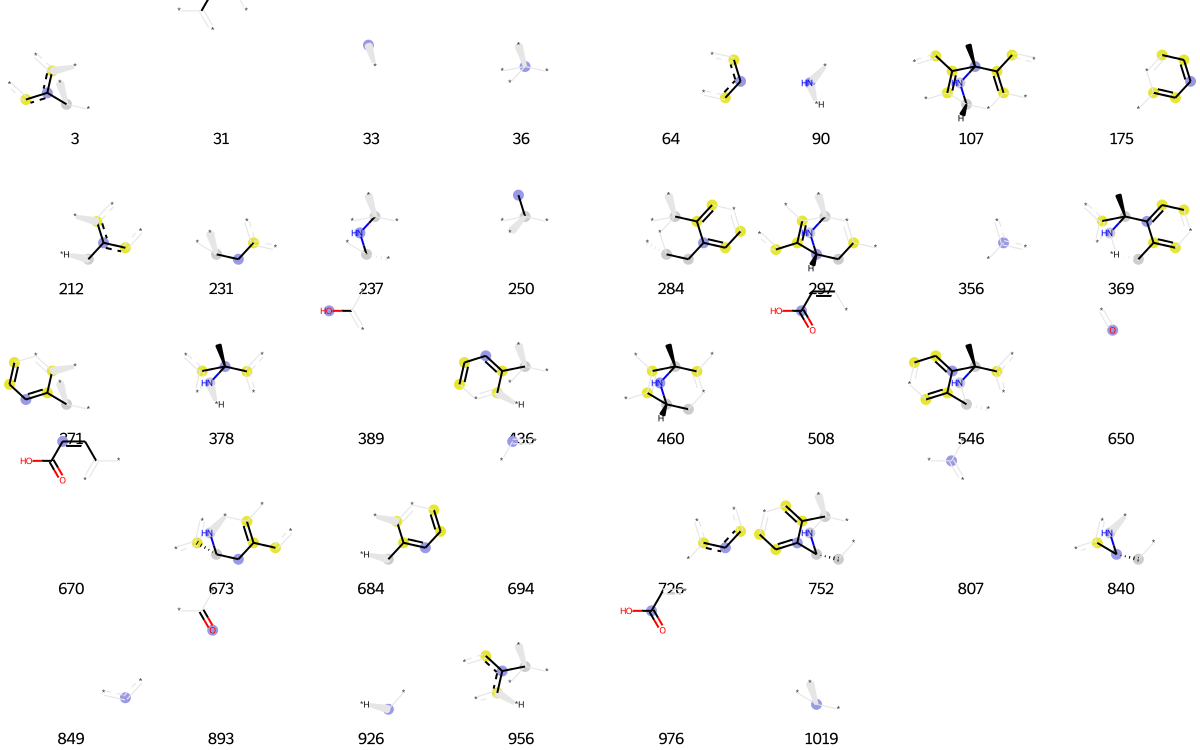

In [1500]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])